<a href="https://colab.research.google.com/github/easeandrelax/blood-sugar-level/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Preprocessing

In [ ]:
!fusermount -u /content/drive
!rm -rf /content/drive


fusermount: failed to unmount /content/drive: Invalid argument


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


🔹 Why Mount Google Drive?
Persistent Storage – Files in /content (Colab's default directory) get deleted after the session ends, but Google Drive keeps your files safe.

Easy File Access – Instead of re-uploading files every time, you can store them in Drive and load them whenever needed.

Handling Large Datasets – If you're working with large files (like images or CSVs), storing them in Drive prevents running out of Colab's limited storage.

Syncing with Other Devices – You can access the same files from different devices without re-downloading them.

In [ ]:
import os

image_folder = "/content/drive/MyDrive/train_images"
image_files = os.listdir(image_folder)

print(f"Total images found: {len(image_files)}")
print(image_files)  # Show first 10 images


Total images found: 869
['1d674e2e32e0.png', '1ee355480567.png', '28f73575e1f2.png', '28f93cad89c5.png', '28a4d00927b7.png', '28751f290ba3.png', '28dc010a0780.png', '286e9981dd9b.png', '28824d12d31d.png', '28503940d10b.png', '290ecdba359f.png', '2927665214e1.png', '291f581d365e.png', '295fdc964f6e.png', '2923971566fe.png', '2967e578939f.png', '291e2ff3d834.png', '29580bed2f7d.png', '28f98cfe3858.png', '2974c6ad1d58.png', '29f9e1ac9507.png', '29f44aea93a4.png', '29a13e666266.png', '2a08ed6bbcbc.png', '299086c6d1b5.png', '29b52f64d2db.png', '29d059522fa1.png', '29bc0e721cfe.png', '2a3a1ed1c285.png', '2a8a9e957a6c.png', '2a2274bcb00a.png', '2a099b247b10.png', '2a3378bcfbcc.png', '2a4520f1f9a3.png', '2a47e5b21791.png', '2a5a8b744f08.png', '2b21d293fdf2.png', '2b10f138e67d.png', '2b3a4a81d748.png', '2b5bb6d33959.png', '2b48daf24be0.png', '2b4c7b5f1f1e.png', '2b074afdf626.png', '2b88cb6e31cd.png', '2b07790a2422.png', '2b2f5a0f880d.png', '2bbcfdc477db.png', '2bd4d4fbed5c.png', '2bbd1f99ecc3.p

In [ ]:
import glob

train_dir = "/content/drive/MyDrive/train_images"
image_count = len(glob.glob(train_dir + "/*.[jp][pn]g"))  # Counts JPG, JPEG, PNG
print("Number of images:", image_count)



Number of images: 865


In [ ]:
image_list = !ls /content/drive/MyDrive/train_images
image_count = len(image_list)
print("Number of images:", image_count)


Number of images: 174


In [ ]:
csv_path = "/content/drive/MyDrive/train_images/train.csv"
if os.path.exists(csv_path):
    print("✅ CSV file found!")
else:
    print("❌ CSV file missing. Please upload it.")


NameError: name 'os' is not defined

In [2]:
import pandas as pd
import os

image_folder = "/content/drive/MyDrive/train_images/train_images"
# Get list of image files
image_files = os.listdir(image_folder)

# Create a DataFrame with filenames and random labels (modify labels accordingly)
df = pd.DataFrame({"Image Name": image_files, "Label": ["class_1"] * len(image_files)})

# Save CSV in Drive
csv_path = "/content/drive/MyDrive/train.csv"
df.to_csv(csv_path, index=False)

print(f"✅ CSV file created and saved at: {csv_path}")


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/train_images/train_images'

In [ ]:
import pandas as pd

CSV_PATH = "/content/drive/MyDrive/train_images/train.csv"
df = pd.read_csv(CSV_PATH)

print("✅ CSV File Loaded Successfully!")
print(df.head())  # Display the first few rows


✅ CSV File Loaded Successfully!
         Image_Name    Label  \
0  7005be54cab1.png  class_1   
1  702de9dcde32.png  class_1   
2  6fe67fd7f5d1.png  class_1   
3  6fe67482bfae.png  class_1   
4  70d0392397de.png  class_1   

                                          Image_Path  
0  /content/drive/MyDrive/train_images/7005be54ca...  
1  /content/drive/MyDrive/train_images/702de9dcde...  
2  /content/drive/MyDrive/train_images/6fe67fd7f5...  
3  /content/drive/MyDrive/train_images/6fe67482bf...  
4  /content/drive/MyDrive/train_images/70d0392397...  


Step 1: Load and Preprocess Data

In [ ]:
!ls /content/drive/MyDrive/train_images



1ae8c165fd53.png  266fbefa58fb.png  34a7dbd3f05c.png  41960d5f58c2.png	4cf4d528c08e.png
1b329a127307.png  2682e6da9050.png  34acae864963.png  41ab357d103f.png	4cfd22ae43d4.png
1b32e1d775ea.png  26999ebc21de.png  351e842842a2.png  4205e9deb058.png	4d009cebabc9.png
1b3647865779.png  269b44e628eb.png  352e4a939242.png  4210809074c1.png	4d167ca69ea8.png
1b398c0494d1.png  269f0792f11f.png  35362d43e753.png  423abbaa5fad.png	4d17559ac1e2.png
1b4625877527.png  276b14f72328.png  354b8911d6ed.png  4242c0d87f57.png	4d1cf360b2d7.png
1b495ac025b7.png  27933cdbe0cc.png  356304d15a5c.png  4246ed634f25.png	4d1e7def7624.png
1b862fb6f65d.png  27f82ada84ac.png  35777eb7859d.png  4276b82e4489.png	4d21ce39c905.png
1b8701231c8f.png  281d7b7c7676.png  357f02a779d7.png  4289af3afbd2.png	4d3de40ced3a.png
1b8ad0afe9fb.png  28503940d10b.png  3580a545016d.png  4294a14c656a.png	4d47300e3ddb.png
1bb0ddfe753a.png  286e9981dd9b.png  358d2224de73.png  42985aa2e32f.png	4d7d6928534a.png
1bea04b2bb2d.png  28751f290ba3.p

In [ ]:
!ls /content/drive/MyDrive/train_images

1ae8c165fd53.png  266fbefa58fb.png  34a7dbd3f05c.png  41960d5f58c2.png	4cf4d528c08e.png
1b329a127307.png  2682e6da9050.png  34acae864963.png  41ab357d103f.png	4cfd22ae43d4.png
1b32e1d775ea.png  26999ebc21de.png  351e842842a2.png  4205e9deb058.png	4d009cebabc9.png
1b3647865779.png  269b44e628eb.png  352e4a939242.png  4210809074c1.png	4d167ca69ea8.png
1b398c0494d1.png  269f0792f11f.png  35362d43e753.png  423abbaa5fad.png	4d17559ac1e2.png
1b4625877527.png  276b14f72328.png  354b8911d6ed.png  4242c0d87f57.png	4d1cf360b2d7.png
1b495ac025b7.png  27933cdbe0cc.png  356304d15a5c.png  4246ed634f25.png	4d1e7def7624.png
1b862fb6f65d.png  27f82ada84ac.png  35777eb7859d.png  4276b82e4489.png	4d21ce39c905.png
1b8701231c8f.png  281d7b7c7676.png  357f02a779d7.png  4289af3afbd2.png	4d3de40ced3a.png
1b8ad0afe9fb.png  28503940d10b.png  3580a545016d.png  4294a14c656a.png	4d47300e3ddb.png
1bb0ddfe753a.png  286e9981dd9b.png  358d2224de73.png  42985aa2e32f.png	4d7d6928534a.png
1bea04b2bb2d.png  28751f290ba3.p

In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define dataset paths
dataset_path = "/content/drive/MyDrive/train_images/"
csv_path = "/content/drive/MyDrive/train_images/train.csv"  # Update with actual file path

# Load CSV
df = pd.read_csv(csv_path)
df['image_path'] = dataset_path + df['Image_Name']  # Full path to images

# Show dataset preview
print(df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
         Image_Name    Label  \
0  7005be54cab1.png  class_1   
1  702de9dcde32.png  class_1   
2  6fe67fd7f5d1.png  class_1   
3  6fe67482bfae.png  class_1   
4  70d0392397de.png  class_1   

                                          Image_Path  \
0  /content/drive/MyDrive/train_images/7005be54ca...   
1  /content/drive/MyDrive/train_images/702de9dcde...   
2  /content/drive/MyDrive/train_images/6fe67fd7f5...   
3  /content/drive/MyDrive/train_images/6fe67482bf...   
4  /content/drive/MyDrive/train_images/70d0392397...   

                                          image_path  
0  /content/drive/MyDrive/train_images/7005be54ca...  
1  /content/drive/MyDrive/train_images/702de9dcde...  
2  /content/drive/MyDrive/train_images/6fe67fd7f5...  
3  /content/drive/MyDrive/train_images/6fe67482bf...  
4  /content/drive/MyDrive/train_images/70d0392397...  


 Preprocess Images for Regression Model

In [ ]:
import os
print(os.path.exists('/content/drive/MyDrive/train_images/train.csv'))


True


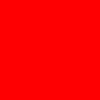

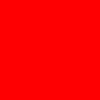

In [ ]:
from PIL import Image
import io
import IPython.display as display

# Create a simple image (100x100 pixels, red color)
image = Image.new("RGB", (100, 100), color="red")

# Save to an in-memory buffer
buffer = io.BytesIO()
image.save(buffer, format="PNG")
buffer.seek(0)  # Move to the beginning of the buffer

# Display the image in Colab
display.display(Image.open(buffer))
from IPython.display import Image as IPImage
IPImage("output.png")


You're using this code to create, save, and display an image using Python's Pillow (PIL) library. Let me break it down for you:

Purpose of This Code
Create an Image


image = Image.new("RGB", (100, 100), color="red")
This creates a 100x100 pixel image filled with red color.

Save to a File (Optional)


image.save("output.png")
This saves the image as a file (output.png), which you can download or view later.

Use an In-Memory Buffer (Optional)


buffer = io.BytesIO()
image.save(buffer, format="PNG")
buffer.seek(0)
Instead of saving to a file, this stores the image in memory (RAM).

This is useful if you want to process or send the image over a network without saving it to disk.

Display the Image in Google Colab


display.display(Image.open(buffer))
This shows the image directly in the Colab output.

Why Are We Using This?
If you want to generate and manipulate images in Python.

If you need to save an image or send it over a network.

If you're working in Google Colab, where files might not always be accessible, so in-memory operations are useful.

If you need real-time image processing without writing to disk.

When to Use This?
If you're training an AI model on images.

If you're working with computer vision tasks.

If you want to modify images dynamically without storing them permanently.

In [ ]:

import cv2
import os
image_folder = "/content/drive/MyDrive/train_images"  # Path to the extracted images
image_files = [os.path.join(image_folder, f) for f in os.listdir(image_folder)]

print("Files in directory:", image_files[:5])  # Print first 5 image paths

test_img = cv2.imread(image_files[0])  # Read the first image
if test_img is None:
    print("Error: OpenCV could not read the image.")
else:
    print("Image read successfully!")



Files in directory: ['/content/drive/MyDrive/train_images/1d674e2e32e0.png', '/content/drive/MyDrive/train_images/1ee355480567.png', '/content/drive/MyDrive/train_images/28f73575e1f2.png', '/content/drive/MyDrive/train_images/28f93cad89c5.png', '/content/drive/MyDrive/train_images/28a4d00927b7.png']
Image read successfully!


Yes! ✅ Since you don’t have labeled blood sugar levels for the images, you need to classify them first. The best way to do this without labels is to use K-Means clustering to group similar images together.

🔹 Steps to Classify Images Using K-Means Clustering
Extract features from images

Use a pretrained model like VGG16 (without the top layer) to extract features from each image.

Apply K-Means clustering

Cluster the images into K groups based on the extracted features.

Manually assign labels

Check the clusters and assign labels like “Low”, “Medium”, “High” for blood sugar levels.

Train a supervised model

Use the labeled data to train a classification model for blood sugar prediction.



✅ Step 1: Extract Features Using VGG16
We will use the VGG16 model (a pretrained CNN model) to extract image features.
the featured image is stored in  "image_features.csv".

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

# Load pre-trained VGG16 model (without the fully connected layers)
model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Function to extract features from an image
def extract_features(img_path):
    img = cv2.imread(img_path)  # Read image
    if img is None:
        print(f"❌ ERROR: Cannot read image {img_path}")
        return None  # Skip unreadable images

    img = cv2.resize(img, (224, 224))  # Resize for VGG16
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    img = preprocess_input(img)  # Normalize

    features = model.predict(img)  # Extract features
    return features.flatten()  # Convert to 1D array

# Define image folder
image_folder = "/content/drive/MyDrive/train_images"

# Get all image paths
image_files = [os.path.join(image_folder, f) for f in os.listdir(image_folder)]

# Extract features, skipping unreadable images
features = [extract_features(img) for img in image_files if extract_features(img) is not None]

# Convert to NumPy array
features = np.array(features)

# Save extracted features to a CSV file for later use
df = pd.DataFrame(features)
df.to_csv("image_features.csv", index=False)

print("✅ Feature extraction complete! Saved as 'image_features.csv'.")



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 781ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 958ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 867

to check the extracted image features

In [ ]:
import pandas as pd

# Load the saved features
features_df = pd.read_csv("image_features.csv")

# Display the first few rows
print(features_df.head())


     0    1    2    3    4    5    6    7    8    9  ...      25078  25079  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  10.667274    0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  10.343986    0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   9.263448    0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  11.718682    0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.000000    0.0   

   25080  25081  25082  25083  25084  25085     25086  25087  
0    0.0    0.0    0.0    0.0    0.0    0.0  3.052916    0.0  
1    0.0    0.0    0.0    0.0    0.0    0.0  1.603216    0.0  
2    0.0    0.0    0.0    0.0    0.0    0.0  1.101052    0.0  
3    0.0    0.0    0.0    0.0    0.0    0.0  6.238902    0.0  
4    0.0    0.0    0.0    0.0    0.0    0.0  0.000000    0.0  

[5 rows x 25088 columns]


Since we don’t have labels, we can group images into clusters using K-Means Clustering and analyze the groups.

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd

# Load extracted features
features_df = pd.read_csv("image_features.csv")

# Apply K-Means (Choose k based on analysis)
k = 3  # Adjust based on data
kmeans = KMeans(n_clusters=k, random_state=42)
features_df['Cluster'] = kmeans.fit_predict(features_df)

# Save clustered images
features_df.to_csv("clustered_images.csv", index=False)
print("✅ Clustering complete! Saved as 'clustered_images.csv'.")


✅ Clustering complete! Saved as 'clustered_images.csv'.


to check the cluster distribution


In [ ]:
import pandas as pd

df = pd.read_csv("clustered_images.csv")
print(df['Cluster'].value_counts())


Cluster
0    534
2    196
1    134
Name: count, dtype: int64


Your clustering result shows three clusters with the following distribution:

Cluster 0: 534 images

Cluster 2: 196 images

Cluster 1: 134 images

🔹 Next Steps
Now, we need to assign blood sugar level categories to these clusters. Since we don’t have actual sugar level data, we can manually map clusters to Low, Medium, or High levels based on distribution and visual analysis.

1️⃣ Assign Blood Sugar Levels to Clusters
If you assume:

Cluster 0 (largest group) → Normal/Low Sugar

Cluster 1 (smallest group) → High Sugar

Cluster 2 (middle-sized) → Medium Sugar

In [ ]:
import pandas as pd

# Load clustered data
df = pd.read_csv("clustered_images.csv")

# Manually map clusters to blood sugar levels
cluster_to_sugar = {0: "Low", 2: "Medium", 1: "High"}  # Adjust if needed
df["Blood_Sugar_Level"] = df["Cluster"].map(cluster_to_sugar)

# Save the labeled dataset
df.to_csv("labeled_images.csv", index=False)
print("✅ Blood sugar labels assigned! Saved as 'labeled_images.csv'.")


✅ Blood sugar labels assigned! Saved as 'labeled_images.csv'.


gray scale conversion of an image

In [ ]:
import cv2
import numpy as np
import os

image_folder = "/content/drive/MyDrive/train_images"
output_folder = "/content/drive/MyDrive/grayscale_images"

# Ensure output folder exists
os.makedirs(output_folder, exist_ok=True)

# Convert each image to grayscale
for filename in os.listdir(image_folder):
    img_path = os.path.join(image_folder, filename)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale

    if img is None:
        print(f"Skipping {filename}, unable to read.")
        continue

    img_resized = cv2.resize(img, (224, 224))  # Resize for VGG16 compatibility
    output_path = os.path.join(output_folder, filename)
    cv2.imwrite(output_path, img_resized)  # Save the grayscale image

print("✅ Grayscale conversion complete! Saved in 'grayscale_images' folder.")


Skipping train_images, unable to read.
Skipping train (1).gsheet, unable to read.
Skipping train.csv, unable to read.
Skipping images_train.gsheet, unable to read.
Skipping train.gsheet, unable to read.
Skipping labeled_images.csv, unable to read.
✅ Grayscale conversion complete! Saved in 'grayscale_images' folder.


Step 1: Extract Features from Grayscale Images
Since VGG16 expects RGB input, convert grayscale images back to 3-channel format before feature extraction.

In [ ]:
import numpy as np
import cv2
import os
import pandas as pd
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

# Load Pre-trained VGG16 Model (without top layers)
model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Path to grayscale images
image_folder =  "/content/drive/MyDrive/grayscale_images"


# Function to preprocess grayscale images for VGG16
def preprocess_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (224, 224))
    img = np.stack((img,) * 3, axis=-1)  # Convert to 3-channel
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

# Extract features for all images
image_files = [os.path.join(image_folder, f) for f in os.listdir(image_folder)]
features = np.array([model.predict(preprocess_image(img)).flatten() for img in image_files])

# Save features
df_features = pd.DataFrame(features)
df_features.to_csv("image_features_grayscale.csv", index=False)

print("✅ Feature extraction from grayscale images complete! Saved as 'image_features_grayscale.csv'.")


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 964ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 819ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 948ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step
1/1 ━━━━━━━━━━━━━━━

Now that we have extracted grayscale image features, we need to cluster them again to classify the images. by means of k clustering method

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

# Load grayscale extracted features
features = pd.read_csv("image_features_grayscale.csv").values

# K-Means clustering
k = 3  # Adjust the number of clusters if needed
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(features)

# Save clustering results
df_clusters = pd.DataFrame({"Image": list(range(len(features))), "Cluster": clusters})
df_clusters.to_csv("clustered_images_grayscale.csv", index=False)

print("✅ Clustering complete! Saved as 'clustered_images_grayscale.csv'.")


✅ Clustering complete! Saved as 'clustered_images_grayscale.csv'.


to check clustering

In [ ]:
import pandas as pd

df = pd.read_csv("clustered_images_grayscale.csv")
print(df['Cluster'].value_counts())

Cluster
0    537
1    196
2    131
Name: count, dtype: int64


to assign the values

In [ ]:
import pandas as pd

# Load clustered data
df = pd.read_csv("clustered_images_grayscale.csv")

# Manually map clusters to blood sugar levels
cluster_to_sugar = {0: "Low", 2: "Medium", 1: "High"}  # Adjust if needed
df["Blood_Sugar_Level"] = df["Cluster"].map(cluster_to_sugar)

# Save the labeled dataset
df.to_csv("labeled_images.csv", index=False)
print("✅ Blood sugar labels assigned! Saved as 'labeled_images.csv'.")

✅ Blood sugar labels assigned! Saved as 'labeled_images.csv'.


to train the CNN model

In [ ]:
import pandas as pd
import tensorflow as tf
import cv2
import numpy as np
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

# Load dataset
csv_path = "/content/drive/MyDrive/train.csv"
df = pd.read_csv(csv_path)

# Fix label conversion
df["Label"] = df["Label"].map({"class_1": 0, "class_2": 1}).astype(int)

# Load images
image_dir = "/content/drive/MyDrive/train_images_preprocessed"
image_size = (224, 224)
images, labels = [], []

for idx, row in df.iterrows():
    image_path = os.path.join(image_dir, row["Image Name"])
    if os.path.exists(image_path):
        img = cv2.imread(image_path)
        img = cv2.resize(img, image_size)
        img = img / 255.0  # Normalize
        images.append(img)
        labels.append(row["Label"])
    else:
        print(f"Warning: Image not found → {image_path}")

# Convert to NumPy
images = np.array(images)
labels = to_categorical(np.array(labels), num_classes=2)

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

# Image augmentation
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

# CNN Model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(224, 224, 3)),
    BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
    BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    Dropout(0.3),
    tf.keras.layers.Dense(2, activation="softmax")
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

# Train model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), validation_data=(X_val, y_val), epochs=20)

# Evaluate model
test_loss, test_acc = model.evaluate(X_val, y_val)
print(f"✅ Test Accuracy: {test_acc:.4f}")

# Save model
model.save("/content/drive/MyDrive/retina_model.keras")
print("✅ Model saved successfully!")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 168s 7s/step - accuracy: 0.5537 - loss: 2.9293 - val_accuracy: 0.5202 - val_loss: 0.8954
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 177s 8s/step - accuracy: 0.5438 - loss: 1.4648 - val_accuracy: 0.5202 - val_loss: 0.9918
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 153s 7s/step - accuracy: 0.5481 - loss: 0.6926 - val_accuracy: 0.5202 - val_loss: 1.2575
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 157s 7s/step - accuracy: 0.4848 - loss: 0.7594 - val_accuracy: 0.5202 - val_loss: 1.0428
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 197s 7s/step - accuracy: 0.5358 - loss: 0.6963 - val_accuracy: 0.5202 - val_loss: 2.0900
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 152s 7s/step - accuracy: 0.5199 - loss: 0.7047 - val_accuracy: 0.5260 - val_loss: 1.0264
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 155s 7s/step - accuracy: 0.5720 - loss: 0.6977 - val_accuracy: 0.4855 - val_loss: 0.7383
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 154s 7s/step - accuracy: 0.5527 - loss: 0.6904 - val_accuracy: 0.4913 - v

In [ ]:
import pandas as pd
import tensorflow as tf
import cv2
import numpy as np
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Load dataset
csv_path = "/content/drive/MyDrive/train.csv"
df = pd.read_csv(csv_path)

# Fix label conversion (more robust handling)
label_map = {"class_1": 0, "class_2": 1}
df["Label"] = df["Label"].map(label_map).astype(int)

# Check class balance
print("Class distribution:\n", df["Label"].value_counts())

# Load images with better error handling
image_dir = "/content/drive/MyDrive/train_images_preprocessed"
image_size = (224, 224)
images, labels = [], []

for idx, row in df.iterrows():
    try:
        image_path = os.path.join(image_dir, row["Image Name"])
        if os.path.exists(image_path):
            img = cv2.imread(image_path)
            if img is not None:
                img = cv2.resize(img, image_size)
                img = img / 255.0  # Normalize
                images.append(img)
                labels.append(row["Label"])
            else:
                print(f"Warning: Corrupted image → {image_path}")
        else:
            print(f"Warning: Image not found → {image_path}")
    except Exception as e:
        print(f"Error loading {row['Image Name']}: {str(e)}")

# Convert to NumPy
images = np.array(images)
labels = to_categorical(np.array(labels), num_classes=2)

# Train-validation split (stratified)
X_train, X_val, y_train, y_val = train_test_split(
    images, labels,
    test_size=0.2,
    random_state=42,
    stratify=labels
)

# Image augmentation (separate for train/val)
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

val_datagen = ImageDataGenerator()  # No augmentation for validation

# CNN Model (improved architecture)
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(224, 224, 3)),
        BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2, 2),
        Dropout(0.1),

        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2, 2),
        Dropout(0.2),

        tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
        BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2, 2),
        Dropout(0.3),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        BatchNormalization(),
        Dropout(0.5),
        tf.keras.layers.Dense(2, activation="softmax")
    ])
    return model

model = create_model()

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6),
    ModelCheckpoint("/content/drive/MyDrive/best_retina_model.keras",
                   save_best_only=True, monitor='val_accuracy')
]

# Compile model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=["accuracy", tf.keras.metrics.AUC()]
)

# Train model with augmented data
batch_size = 32
history = model.fit(
    train_datagen.flow(X_train, y_train, batch_size=batch_size),
    steps_per_epoch=len(X_train)//batch_size,
    validation_data=val_datagen.flow(X_val, y_val),
    epochs=30,
    callbacks=callbacks
)

# Evaluate model
test_loss, test_acc, test_auc = model.evaluate(val_datagen.flow(X_val, y_val))
print(f"✅ Test Accuracy: {test_acc:.4f}, AUC: {test_auc:.4f}")

# Save final model
model.save("/content/drive/MyDrive/retina_model_final.keras")
print("✅ Model saved successfully!")

Class distribution:
 Label
0    435
1    435
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 180s 8s/step - accuracy: 0.5033 - auc: 0.5008 - loss: 6.7471 - val_accuracy: 0.5087 - val_auc: 0.5280 - val_loss: 5.6991 - learning_rate: 1.0000e-04
Epoch 2/30
 1/21 ━━━━━━━━━━━━━━━━━━━━ 2:58 9s/step - accuracy: 0.5000 - auc: 0.3989 - loss: 6.2612

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 373ms/step - accuracy: 0.5000 - auc: 0.3989 - loss: 6.2612 - val_accuracy: 0.5087 - val_auc: 0.5296 - val_loss: 5.6962 - learning_rate: 1.0000e-04
Epoch 3/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 156s 7s/step - accuracy: 0.5296 - auc: 0.5382 - loss: 6.0599 - val_accuracy: 0.5029 - val_auc: 0.5139 - val_loss: 5.8716 - learning_rate: 1.0000e-04
Epoch 4/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 513ms/step - accuracy: 0.4062 - auc: 0.3887 - loss: 6.2552 - val_accuracy: 0.5029 - val_auc: 0.5151 - val_loss: 5.8796 - learning_rate: 1.0000e-04
Epoch 5/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 167s 8s/step - accuracy: 0.5284 - auc: 0.5288 - loss: 5.8688 - val_accuracy: 0.5029 - val_auc: 0.5090 - val_loss: 6.0881 - learning_rate: 1.0000e-04
Epoch 6/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 14s 407ms/step - accuracy: 0.5938 - auc: 0.5615 - loss: 5.6520 - val_accuracy: 0.5029 - val_auc: 0.5075 - val_loss: 6.1261 - learning_rate: 2.0000e-05
Epoch 7/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 173s 8s/step - accuracy: 0.5118 

In [ ]:
import pandas as pd

# Load labeled CSV
df = pd.read_csv("/content/drive/MyDrive/train.csv")  # Adjust path if needed

# Count images per class
print(df["Label"].value_counts())


Label
class_1    435
class_2    435
Name: count, dtype: int64


In [ ]:
import os
import cv2
import pandas as pd

valid_extensions = (".jpg", ".jpeg", ".png", ".bmp")

# Define folders
image_dir = "/content/drive/MyDrive/train_images"
save_dir = "/content/drive/MyDrive/train_images_preprocessed"

# Create folder if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

# Load CSV
df = pd.read_csv("/content/drive/MyDrive/train_images/train.csv")
df.columns = df.columns.str.strip()  # Remove unwanted spaces from column names

# Ensure correct column name
expected_col = 'Image Name'  # Adjust this based on your CSV file
if expected_col not in df.columns:
    raise ValueError(f"❌ Error: Column '{expected_col}' not found in CSV! Available columns: {df.columns}")

processed_count = 0
processed_data = []  # To store labeled image info

# Process and save images
for index, row in df.iterrows():
    img_name = row[expected_col]
    img_path = os.path.join(image_dir, img_name)
    save_path = os.path.join(save_dir, img_name)

    # Skip non-image files
    if not img_name.lower().endswith(valid_extensions):
        print(f"⚠️ Skipping non-image file: {img_name}")
        continue

    # Read and process the image
    image = cv2.imread(img_path)
    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        image = cv2.resize(image, (224, 224))  # Resize to 224x224
        cv2.imwrite(save_path, cv2.cvtColor(image, cv2.COLOR_RGB2BGR))  # Save image
        processed_count += 1
        processed_data.append([img_name, row["Label"]])  # Store image name & label
    else:
        print(f"⚠️ Warning: Could not read {img_path}")

# Save labeled data to CSV
labeled_df = pd.DataFrame(processed_data, columns=["Image Name", "Label"])
labeled_df.to_csv("/content/drive/MyDrive/train_images/labeled_images.csv", index=False)

# Final success message
print(f"✅ Processed {processed_count} images successfully!")
print("✅ All images preprocessed and saved!")
print("✅ Labeled images saved in 'labeled_images.csv'")
print(f"Images loaded: {len(X)}, Labels loaded: {len(y)}")


⚠️ Skipping non-image file: train_images
⚠️ Skipping non-image file: train (1).gsheet
⚠️ Skipping non-image file: train.csv
⚠️ Skipping non-image file: images_train.gsheet
⚠️ Warning: Could not read /content/drive/MyDrive/train_images/2bb063318cf1.png
⚠️ Skipping non-image file: train.gsheet
✅ Processed 864 images successfully!
✅ All images preprocessed and saved!
✅ Labeled images saved in 'labeled_images.csv'
Images loaded: 0, Labels loaded: 0


In [ ]:
import os

# Path to the specific image
image_path = "/content/drive/MyDrive/train_images/2bb063318cf1.png"

# Check if the file exists before deleting
if os.path.exists(image_path):
    os.remove(image_path)
    print(f"🗑 Deleted: {image_path}")
else:
    print("⚠️ File not found! It may have already been deleted.")


🗑 Deleted: /content/drive/MyDrive/train_images/2bb063318cf1.png


In [ ]:
import pandas as pd

csv_path = "/content/drive/MyDrive/train_images/labeled_images.csv"
df = pd.read_csv(csv_path)

print("CSV Preview:")
print(df.head())  # Show first few rows
print("\nCSV Columns:", df.columns)  # Check if 'Image_Name' and 'Label' exist
df = pd.read_csv("/content/drive/MyDrive/train_images/labeled_images.csv")
df.columns = df.columns.str.strip().str.replace(" ", "_")  # Remove spaces
print(df.head())  # Verify the change
print("\nCSV Columns:", df.columns)


CSV Preview:
         Image Name    Label
0  2bb3c492d6d3.png  class_1
1  2ba0b0d9bda2.png  class_1
2  2c2aa057afc5.png  class_1
3  2c1d5be654dd.png  class_1
4  2c77bf969079.png  class_1

CSV Columns: Index(['Image Name', 'Label'], dtype='object')
         Image_Name    Label
0  2bb3c492d6d3.png  class_1
1  2ba0b0d9bda2.png  class_1
2  2c2aa057afc5.png  class_1
3  2c1d5be654dd.png  class_1
4  2c77bf969079.png  class_1

CSV Columns: Index(['Image_Name', 'Label'], dtype='object')


In [ ]:
import os
missing = []
for img_name in df['Image Name']:
    img_path = f"/content/drive/MyDrive/train_images_preprocessed/{img_name}"
    if not os.path.exists(img_path):
        missing.append(img_name)

print(f"Missing images: {len(missing)}")
if missing:
    print(missing[:10])  # Show first 10 missing images


Missing images: 6
['train_images', 'train (1).gsheet', 'train.csv', 'images_train.gsheet', '2bb063318cf1.png', 'train.gsheet']


In [ ]:
import os
from PIL import Image

image_dir = "/content/drive/MyDrive/train_images/train_images"

valid_extensions = {".jpg", ".jpeg", ".png", ".bmp", ".gif"}

def convert_images(image_dir):
    for filename in os.listdir(image_dir):
        file_path = os.path.join(image_dir, filename)
        # Skip directories and non-image files
        if not os.path.isfile(file_path) or not any(filename.lower().endswith(ext) for ext in valid_extensions):
            print(f"Skipping {filename} (not an image file)")
            continue
        try:
            with Image.open(file_path) as img:
                img.convert("RGB").save(file_path, "PNG")  # Save as PNG
        except Exception as e:
            print(f"Skipping {filename}: {e}")

convert_images(image_dir)
print("Image conversion complete.")


In [ ]:
import os
import pandas as pd
import numpy as np
from PIL import Image

image_dir = "/content/drive/MyDrive/train_images/train_images"
valid_extensions = {".jpg", ".jpeg", ".png", ".bmp", ".gif"}

# List to store image data
image_data = []

# Read images and store pixel values
for filename in os.listdir(image_dir):
    file_path = os.path.join(image_dir, filename)
    if not any(filename.lower().endswith(ext) for ext in valid_extensions):
        print(f"Skipping {filename} (not an image file)")
        continue
    try:
        with Image.open(file_path) as img:
            img = img.resize((128, 128))  # Resize for uniform shape
            img_array = np.array(img)  # Convert image to NumPy array
            image_data.append(img_array.flatten())  # Flatten and store pixel values
    except Exception as e:
        print(f"Skipping {filename}: {e}")

# Convert list to Pandas DataFrame
df = pd.DataFrame(image_data)
print(df.shape)  # Check dimensions of DataFrame



In [ ]:
import os
import pandas as pd
import numpy as np
from PIL import Image, ImageFile

# Fix for truncated images
ImageFile.LOAD_TRUNCATED_IMAGES = True

image_dir = "/content/drive/MyDrive/train_images/train_images"
valid_extensions = {".jpg", ".jpeg", ".png", ".bmp", ".gif"}

image_data = []

for filename in os.listdir(image_dir):
    file_path = os.path.join(image_dir, filename)
    if not any(filename.lower().endswith(ext) for ext in valid_extensions):
        print(f"Skipping {filename} (not an image file)")
        continue
    try:
        with Image.open(file_path) as img:
            img = img.resize((128, 128))  # Resize to 128x128
            img_array = np.array(img)  # Convert to NumPy array
            image_data.append(img_array.flatten())  # Flatten and store
    except Exception as e:
        print(f"Skipping {filename}: {e}")  # Ignore errors

# Convert to Pandas DataFrame
df = pd.DataFrame(image_data)
print(f"Shape of DataFrame: {df.shape}")  # Check dimensions


In [ ]:
img = img.convert("L")  # Convert to grayscale
img_array = np.array(img).flatten()  # 128x128 = 16384 instead of 49152


In [ ]:
import matplotlib.pyplot as plt
import cv2

image_path = "your_image_path_here.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is not None:
    # Resize image to 512x512 for faster processing
    image = cv2.resize(image, (512, 512))

    plt.imshow(image, cmap='gray')
    plt.title("Grayscale Image Check")
    plt.axis("off")
    plt.show()
else:
    print("Error: Image not found!")


In [ ]:
for filename in os.listdir(image_dir):
    file_path = os.path.join(image_dir, filename)
    print(f"Processing: {filename}")  # Debugging statement


In [ ]:
import os
print("Directory exists:", os.path.exists(image_dir))


In [ ]:
import os
print(os.listdir("/content/drive/MyDrive/train_images"))



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load an example image (modify the path based on your dataset)
image_path = "your_image_path_here.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale mode

# Check if the image is grayscale (should have only 2 dimensions)
if len(image.shape) == 2:
    print("The image is grayscale ✅")
else:
    print("The image is NOT grayscale ❌")

# Display the image
plt.imshow(image, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()


In [ ]:
import cv2

image_path = "/content/drive/MyDrive/train_images/train_images.jpg"  # Change this to the correct path

image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Error: Image not loaded. Check the file path and format!")
else:
    print("Image loaded successfully.")
    print("Image shape:", image.shape)


In [ ]:
!ls /content/drive/MyDrive/train_images/


In [ ]:
import os

image_path = "/content/drive/MyDrive/train_images/7005be54cab1.png"
print("Does the file exist?", os.path.exists(image_path))


In [ ]:
!ls /content/drive/MyDrive/train_images/*.png

!ls /content/drive/MyDrive/train_images/class_1/*.png
!ls /content/drive/MyDrive/train_images/class_2/*.png


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
!ls /content/drive/MyDrive/train_images/


In [ ]:
image_path = "/content/drive/MyDrive/train_images/class_1/7005be54cab1.png"


In [ ]:
!unzip -o "/content/drive/MyDrive/train_images.zip" -d "/content/drive/MyDrive/train_images/"

Archive:  /content/drive/MyDrive/train_images.zip
  inflating: /content/drive/MyDrive/train_images/train_images/1ae8c165fd53.png  
  inflating: /content/drive/MyDrive/train_images/train_images/1b329a127307.png  
  inflating: /content/drive/MyDrive/train_images/train_images/1b32e1d775ea.png  
  inflating: /content/drive/MyDrive/train_images/train_images/1b3647865779.png  
  inflating: /content/drive/MyDrive/train_images/train_images/1b398c0494d1.png  
  inflating: /content/drive/MyDrive/train_images/train_images/1b4625877527.png  
  inflating: /content/drive/MyDrive/train_images/train_images/1b495ac025b7.png  
  inflating: /content/drive/MyDrive/train_images/train_images/1b862fb6f65d.png  
  inflating: /content/drive/MyDrive/train_images/train_images/1b8701231c8f.png  
  inflating: /content/drive/MyDrive/train_images/train_images/1b8ad0afe9fb.png  
  inflating: /content/drive/MyDrive/train_images/train_images/1bb0ddfe753a.png  
  inflating: /content/drive/MyDrive/train_images/train_imag

In [ ]:
import os

image_dir = "/content/drive/MyDrive/train_images"  # Update if your path is different

# List first 10 files in directory
if os.path.exists(image_dir):
    print("Files in directory:", os.listdir(image_dir)[:10])
else:
    print(f"Directory {image_dir} does not exist!")


In [ ]:
import os

image_dir = "/content/drive/MyDrive/train_images"

if os.path.exists(image_dir):
    print("Files in train_images directory:", os.listdir(image_dir)[:10])
else:
    print(f"Directory {image_dir} does not exist!")


In [ ]:
!ls -lh "/content/drive/MyDrive/train_images"


In [ ]:
!ls -lh "/content/drive/MyDrive/train_images"


In [ ]:
import glob

image_files = glob.glob("/content/drive/MyDrive/train_images/*", recursive=True)

print(f"Total images found: {len(image_files)}")
print(image_files[:5])  # Print first 5 image paths


In [ ]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/train.zip"  # Change to your ZIP file path
extract_path = "/content/drive/MyDrive/train_images/"

# Extract ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction complete!")


In [ ]:
!unzip "/content/drive/MyDrive/train.zip" -d "/content/drive/MyDrive/train_images"


verifying


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


importing the necessary files

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import cv2
import glob



In [ ]:
obtaing the list of images inside the train_images


In [ ]:
import os
dataset_path = '/content/drive/MyDrive/train_images/train_images'
print(len(os.listdir(dataset_path)))
os.listdir(dataset_path)


2930


['76b950c6ed5e.png',
 '76bc31e0d3be.png',
 '76be29bb30b2.png',
 '76cab26493f1.png',
 '76c0c7e1b6cb.png',
 '76cb010f7aa0.png',
 '76cfe8967f7d.png',
 '76e589911303.png',
 '76e6a9238570.png',
 '76df141d966b.png',
 '76e5b50f95a7.png',
 '76f3473df8a6.png',
 '76fe19ff64fb.png',
 '772af553b8b7.png',
 '77543f66a84a.png',
 '7743f4e04a6d.png',
 '77a1f1398fdb.png',
 '77a9538b8362.png',
 '77acc2cafee1.png',
 '77ab222bf85c.png',
 '77b7b71ebcc3.png',
 '77e15f213b04.png',
 '77baa08a1345.png',
 '77e7c7a160c8.png',
 '77f69c7ff324.png',
 '780be525036d.png',
 '780f9c237c56.png',
 '780f9daaa24b.png',
 '7828dd083cdc.png',
 '7831ce1d895e.png',
 '784d6d302f98.png',
 '785777558f05.png',
 '7877be80901c.png',
 '788ddb0b70b7.png',
 '78937523f7a8.png',
 '789434d095d1.png',
 '789c60cba801.png',
 '789f0ec1eab8.png',
 '78a577c3e0bf.png',
 '78b3f819dcc5.png',
 '78bcdffb8785.png',
 '78d53c82a23e.png',
 '79059d0592c4.png',
 '799cb4c816ae.png',
 '799214e8b07c.png',
 '79540be95177.png',
 '79ade634c633.png',
 '79be2ff796b

checking if the os exist

In [ ]:
import os
dataset_path ='/content/drive/MyDrive/train_images/train_images'

if os.path.exists(dataset_path):
  print("Dataset path exists")
else:
  print ('Dataset path does not exist')

Dataset path exists


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/train_images/train.csv')
print(df.head())  # Print first few rows


         Image Name    Label
0  1b329a127307.png  class_1
1  1ae8c165fd53.png  class_1
2  1b398c0494d1.png  class_1
3  1b3647865779.png  class_1
4  1b32e1d775ea.png  class_1


In [ ]:
import pandas as pd
import os

# Load CSV file
df = pd.read_csv("/content/drive/MyDrive/train_images/train.csv")

# Replace spaces in column names with underscores
df.columns = df.columns.str.replace(" ", "_")

# Display updated column names
print(df.columns)  # Should now show ['Image_Name', 'Label']

# Filter out non-image entries (if your images are .jpg, .png, etc.)
valid_extensions = (".jpg", ".jpeg", ".png", ".bmp")  # Add any other formats you use
df = df[df["Image_Name"].astype(str).str.endswith(valid_extensions)]

# Create Image Path column
df["Image_Path"] = df["Image_Name"].apply(lambda x: f"/content/drive/MyDrive/train_images/train_images/{x}")

# Check if files exist
missing_files = [path for path in df["Image_Path"] if not os.path.exists(path)]

if missing_files:
    print(f"❌ {len(missing_files)} files are still missing! Example:")
    print(missing_files[:5])  # Show first 5 missing files
else:
    print("✅ All files exist!")


Index(['Image_Name', 'Label'], dtype='object')
✅ All files exist!


In [ ]:
import pandas as pd

# Load CSV file
df = pd.read_csv("/content/drive/MyDrive/train_images/train.csv")

# Replace spaces in column names with underscores
df.columns = df.columns.str.replace(" ", "_")

# Display updated column names
print(df.columns)  # Should now show ['Image_Name', 'Label']

# Create Image Path column
df["Image_Path"] = df["Image_Name"].apply(lambda x: f"/content/drive/MyDrive/train_images/train_images/{x}")

# Display only required columns
print(df[["Image_Name", "Label", "Image_Path"]].head())  # Show first 5 rows


Index(['Image_Name', 'Label'], dtype='object')
         Image_Name    Label  \
0  1b329a127307.png  class_1   
1  1ae8c165fd53.png  class_1   
2  1b398c0494d1.png  class_1   
3  1b3647865779.png  class_1   
4  1b32e1d775ea.png  class_1   

                                          Image_Path  
0  /content/drive/MyDrive/train_images/train_imag...  
1  /content/drive/MyDrive/train_images/train_imag...  
2  /content/drive/MyDrive/train_images/train_imag...  
3  /content/drive/MyDrive/train_images/train_imag...  
4  /content/drive/MyDrive/train_images/train_imag...  


In [ ]:
!ls '/content/drive/MyDrive/train_images/train.csv'


/content/drive/MyDrive/train_images/train.csv


In [ ]:

!ls '/content/drive/MyDrive'

 Classroom  'Colab Notebooks'   train.gsheet   train_images   train_images.zip


In [ ]:
!find /content/drive/MyDrive -name "train_images.zip"


/content/drive/MyDrive/train_images.zip


unzip the train images before using it for image preprocessing

In [ ]:
#!unzip "/content/drive/MyDrive/datasets/train_images.zip" -d "/content/drive/MyDrive/train_images"
!unzip "/content/drive/MyDrive/train_images.zip" -d "/content/drive/MyDrive"



Archive:  /content/drive/MyDrive/train_images.zip
replace /content/drive/MyDrive/train_images/1ae8c165fd53.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/drive/MyDrive/train_images/1ae8c165fd53.png  
  inflating: /content/drive/MyDrive/train_images/1b329a127307.png  
  inflating: /content/drive/MyDrive/train_images/1b32e1d775ea.png  
  inflating: /content/drive/MyDrive/train_images/1b3647865779.png  
  inflating: /content/drive/MyDrive/train_images/1b398c0494d1.png  
  inflating: /content/drive/MyDrive/train_images/1b4625877527.png  
  inflating: /content/drive/MyDrive/train_images/1b495ac025b7.png  
  inflating: /content/drive/MyDrive/train_images/1b862fb6f65d.png  
  inflating: /content/drive/MyDrive/train_images/1b8701231c8f.png  
  inflating: /content/drive/MyDrive/train_images/1b8ad0afe9fb.png  
  inflating: /content/drive/MyDrive/train_images/1bb0ddfe753a.png  
  inflating: /content/drive/MyDrive/train_images/1bea04b2bb2d.png  
  inflating: /content/drive/MyDr

Load and preprocess a single image

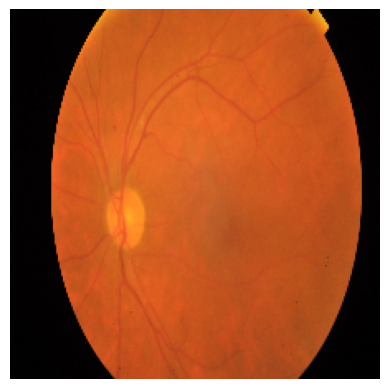

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the image path
image_path = "/content/drive/MyDrive/train_images/a95858e052d6.png"

# Load the image
image = cv2.imread(image_path)  # Read in BGR format
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Resize the image (e.g., to 224x224 for a model)
image_resized = cv2.resize(image, (224, 224))

# Normalize pixel values to [0,1]
image_normalized = image_resized / 255.0

# Display the preprocessed image
plt.imshow(image_normalized)
plt.axis("off")
plt.show()


In [ ]:
!git clone https://github.com/easeandrelax/blood-sugar-level.git


Cloning into 'blood-sugar-level'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 63 (delta 35), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (63/63), 28.25 MiB | 23.16 MiB/s, done.
Resolving deltas: 100% (35/35), done.


In [ ]:
!ls blood-sugar-level/train_images/


ls: cannot access 'blood-sugar-level/train_images/': No such file or directory


In [ ]:
!ls


blood-sugar-level  drive  sample_data


In [ ]:
!ls blood-sugar-level


'retina_blood_sugar (2).py'   retina_blood_sugar.ipynb	 Welcome_To_Colab.ipynb


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls /content/drive/MyDrive/train_images/train_images


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1ae8c165fd53.png  4462fba1d2a1.png  6c4ec95dd8ba.png  958c1fa044ba.png	bb733062f494.png
1b329a127307.png  4464bb62bf20.png  6c6505a0c637.png  959bb2d01091.png	bb752b179751.png
1b32e1d775ea.png  4478b870e549.png  6c6efb6b1358.png  959dc602febc.png	bb783d8e496f.png
1b3647865779.png  44855f666225.png  6c9c902a97de.png  95a4cc805c7b.png	bb7e0a2544cd.png
1b398c0494d1.png  44878f34e31f.png  6cb96a6fb029.png  95e732e043a1.png	bb85097857fa.png
1b4625877527.png  4489d421e5aa.png  6cb98da77e3e.png  962c0fc85e13.png	bb9a3d835a94.png
1b495ac025b7.png  44976c3b11a6.png  6cbc3dad809c.png  962cf85e4f6d.png	bba38f2294a3.png
1b862fb6f65d.png  44a4d04162cc.png  6ccfdb031184.png  966c07831334.png	bc23f74e14dd.png
1b8701231c8f.png  44a86263117b.png  6cd606dc52e9.png  96793edb1003.png	bc34ed91c9bc.png
1b8ad0afe9fb.png  44c869174e3a.png  6cdd0f985270.png  9688c6ef5dc5.png	bc34f52c

In [ ]:
!ls blood-sugar-level/train_images


load and preprocess all images and the save it to "/content/drive/MyDrive/train_images_preprocessed"

to save all the preprocessed images

In [ ]:
import os
import cv2
import pandas as pd

valid_extensions = (".jpg", ".jpeg", ".png", ".bmp")

# Create a folder to save preprocessed images
save_dir = "/content/drive/MyDrive/train_images_preprocessed"
os.makedirs(save_dir, exist_ok=True)

#

# Load CSV
df = pd.read_csv("/content/drive/MyDrive/train_images/train.csv")

# Create a folder to save preprocessed images
save_dir = "/content/drive/MyDrive/train_images_preprocessed"
os.makedirs(save_dir, exist_ok=True)
processed_count = 0
# Process and save images
for index, row in df.iterrows():
    img_path = f"/content/drive/MyDrive/train_images/{row['Image_Name']}"
    save_path = f"{save_dir}/{row['Image_Name']}"  # Save with the same name

    image = cv2.imread(img_path)
    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert color
        image = cv2.resize(image, (224, 224))  # Resize
        cv2.imwrite(save_path, cv2.cvtColor(image, cv2.COLOR_RGB2BGR))  # Save preprocessed image
        processed_count += 1
    else:
      continue

     #   processed_count += 1

      print(f"✅ Processed {processed_count} images successfully!")

print("✅ All images preprocessed and saved!")


✅ All images preprocessed and saved!


In [ ]:
import os
import cv2
import pandas as pd

valid_extensions = (".jpg", ".jpeg", ".png", ".bmp")

# Define folders
image_dir = "/content/drive/MyDrive/train_images"
save_dir = "/content/drive/MyDrive/train_images_preprocessed"

# Create folder if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

# Load CSV
df = pd.read_csv("/content/drive/MyDrive/train_images/train.csv")
df.columns = df.columns.str.strip()  # Remove unwanted spaces from column names

# Ensure correct column name
expected_col = 'Image Name'  # Adjust this based on your CSV file
if expected_col not in df.columns:
    raise ValueError(f"❌ Error: Column '{expected_col}' not found in CSV! Available columns: {df.columns}")

processed_count = 0
processed_data = []  # To store labeled image info

# Process and save images
for index, row in df.iterrows():
    img_name = row[expected_col]
    img_path = os.path.join(image_dir, img_name)
    save_path = os.path.join(save_dir, img_name)

    # Skip non-image files
    if not img_name.lower().endswith(valid_extensions):
        print(f"⚠️ Skipping non-image file: {img_name}")
        continue

    # Read and process the image
    image = cv2.imread(img_path)
    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        image = cv2.resize(image, (224, 224))  # Resize to 224x224
        cv2.imwrite(save_path, cv2.cvtColor(image, cv2.COLOR_RGB2BGR))  # Save image
        processed_count += 1
        processed_data.append([img_name, row["Label"]])  # Store image name & label
    else:
        print(f"⚠️ Warning: Could not read {img_path}")

# Save labeled data to CSV
labeled_df = pd.DataFrame(processed_data, columns=["Image_Name", "Label"])
labeled_df.to_csv("/content/drive/MyDrive/train_images/labeled_images.csv", index=False)

# Final success message
print(f"✅ Processed {processed_count} images successfully!")
print("✅ All images preprocessed and saved!")
print("✅ Labeled images saved in 'labeled_images.csv'")



ValueError: ❌ Error: Column 'Image Name' not found in CSV! Available columns: Index(['Image_Name', 'Label', 'Image_Path'], dtype='object')

to verify if it is saved or not


In [ ]:
import os

processed_path = "/content/drive/MyDrive/train_images_preprocessed"  # Change if different
files = os.listdir(processed_path)

print(f"Total processed images: {len(files)}")
print("Sample files:", files[:5])  # Display first 5 filenames


Total processed images: 223
Sample files: ['1b329a127307.png', '1ae8c165fd53.png', '1b398c0494d1.png', '1b3647865779.png', '1b32e1d775ea.png']


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/train_images/train.csv")  # Replace with your actual CSV file path
print(df.columns)


Index(['Image Name', 'Label'], dtype='object')


#now all the images are preprocessed and saved in /content/drive/MyDrive/train_images_preprocessed

split the data for training

In [ ]:
import pandas as pd
import os

# Load the labels CSV (Update path if needed)
df = pd.read_csv("/content/drive/MyDrive/train_images/train.csv")

# Get list of actual images in the folder
image_folder = "/content/drive/MyDrive/train_images/train_images"  # Change if needed
available_images = set(os.listdir(image_folder))  # List of actual images

# Check how many labels exist for images
df["exists"] = df["Image Name"].apply(lambda x: x in available_images)

# Print the counts
print(df["exists"].value_counts())  # Should print number of True/False
'''
df = df[df["exists"]]  # Keep only labels with actual images
df.drop(columns=["exists"], inplace=True)  # Remove extra column
y = df["Label"].values  # Extract the updated labels
'''
df = df[df["exists"]].copy()  # Keep only valid labels, avoid SettingWithCopyWarning
df.drop(columns=["exists"], inplace=True)  # Remove extra column
y = df["Label"].values  # Extract updated labels

print(f"Fixed X shape: {X.shape}")  # Should be (223, 224, 224, 3)
print(f"Fixed y shape: {y.shape}")  # Should be (223,)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")



exists
True     223
False      4
Name: count, dtype: int64
Fixed X shape: (223, 224, 224, 3)
Fixed y shape: (223,)
Training set: (178, 224, 224, 3), Testing set: (45, 224, 224, 3)


 Data Augmentation (Best for small datasets)
 Data augmentation artificially increases the dataset size by applying transformations (rotation, flipping, zooming, etc.).
✔ Helps generalization
✔ Reduces overfitting
✔ Creates more diverse training data

In [ ]:
print(df.columns)


Index(['Image_Name', 'Label'], dtype='object')


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Load CSV and clean column names
df = pd.read_csv("/content/drive/MyDrive/train.csv")
df.columns = df.columns.str.strip()  # Remove extra spaces if any

# Ensure correct column names
expected_cols = ['Image Name', 'Label']
if not all(col in df.columns for col in expected_cols):
    print(f"❌ CSV does not have expected columns: {expected_cols}")
    print(f"✅ Found columns: {df.columns.tolist()}")
    raise ValueError("CSV column names do not match expected format.")

# Convert categorical labels to numeric values
label_mapping = {label: idx for idx, label in enumerate(sorted(df['Label'].unique()))}
df['Label'] = df['Label'].map(label_mapping)

# Define the preprocessed image folder
preprocessed_path = "/content/drive/MyDrive/train_images_preprocessed/"

# Lists to store processed images and valid labels
processed_images = []
valid_labels = []

# Loop through all images
for index, row in df.iterrows():
    img_path = f"{preprocessed_path}{row['Image Name']}"  # Update path to preprocessed folder
    image = cv2.imread(img_path)

    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        image = cv2.resize(image, (224, 224))  # Resize to match model input
        image = image / 255.0  # Normalize
        processed_images.append(image)
        valid_labels.append(row['Label'])  # Keep only corresponding labels
    else:
        continue

# Convert to NumPy array and ensure numeric labels
X = np.array(processed_images)
y = np.array(valid_labels, dtype=np.float32)  # Convert labels to float

# Check if lengths are consistent
if len(X) != len(y):
    raise ValueError(f"❌ Mismatch: X has {len(X)} images, but y has {len(y)} labels.")

print(f"✅ Loaded {len(X)} preprocessed images for training!")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")

# Normalize target values
y_max = np.max(y_train)
if y_max > 0:  # Prevent division by zero
    y_train = y_train / y_max
    y_test = y_test / y_max

# Step 1: Define CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='linear')  # Output layer for blood level prediction
])

# Step 2: Compile the Model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Step 3: Define Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

# Fit the generator to the training data
datagen.fit(X_train)

from tensorflow.keras.callbacks import EarlyStopping

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model using the augmented data
model.fit(datagen.flow(X_train, y_train, batch_size=32),
          validation_data=(X_test, y_test),
          epochs=30, callbacks=[early_stopping])

# Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

# Make predictions
y_pred = model.predict(X_test)

# Print sample predictions
print("Predicted Values:", y_pred[:10].flatten())
print("Actual Values:", y_test[:10].flatten())

# Print label mapping for reference
print("Label Mapping:", label_mapping)


✅ Loaded 864 preprocessed images for training!
Training Set: (691, 224, 224, 3), Testing Set: (173, 224, 224, 3)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - loss: 267.2942 - mae: 7.2906 - val_loss: 0.2878 - val_mae: 0.5096
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 83s 4s/step - loss: 0.3346 - mae: 0.5029 - val_loss: 0.2798 - val_mae: 0.5052
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - loss: 0.3020 - mae: 0.5042 - val_loss: 0.2715 - val_mae: 0.5035
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 91s 4s/step - loss: 0.2881 - mae: 0.4883 - val_loss: 0.2768 - val_mae: 0.5040
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 84s 4s/step - loss: 0.2825 - mae: 0.4858 - val_loss: 0.2593 - val_mae: 0.4997
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 147s 4s/step - loss: 0.2935 - mae: 0.5009 - val_loss: 0.2577 - val_mae: 0.4998
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 83s 4s/step - loss: 0.2722 - mae: 0.4799 - val_loss: 0.2847 - val_mae: 0.5062
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - loss: 0.3052 - mae: 0.5019 - val_loss: 0.2679 - val_mae: 0.5046
Epoch 9/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 87s 4s/step - loss: 0.2938 - ma

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Load CSV and clean column names
df = pd.read_csv("/content/drive/MyDrive/train_images/train.csv")
df.columns = df.columns.str.strip()

# Ensure correct column names
expected_cols = ['Image Name', 'Label']
if not all(col in df.columns for col in expected_cols):
    raise ValueError(f"CSV column names do not match expected format. Found: {df.columns.tolist()}")

# Convert categorical labels to numeric values
label_mapping = {label: idx for idx, label in enumerate(sorted(df['Label'].unique()))}
df['Label'] = df['Label'].map(label_mapping)

# Define the preprocessed image folder
preprocessed_path = "/content/drive/MyDrive/train_images_preprocessed/"

# Lists to store processed images and valid labels
processed_images = []
valid_labels = []

# Allowed image file extensions
valid_extensions = {".jpg", ".jpeg", ".png"}

# Loop through all images
for index, row in df.iterrows():
    img_path = os.path.join(preprocessed_path, row['Image Name'])

    # Skip if not an image file
    if not any(img_path.lower().endswith(ext) for ext in valid_extensions):
        print(f"⚠️ Skipping non-image file: {img_path}")
        continue

    image = cv2.imread(img_path)

    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        image = cv2.resize(image, (224, 224))  # Resize to match model input
        image = image / 255.0  # Normalize
        processed_images.append(image)
        valid_labels.append(row['Label'])  # Keep only corresponding labels
    else:
        print(f"⚠️ Warning: Could not read {img_path}")

# Convert to NumPy array and ensure numeric labels
X = np.array(processed_images)
y = np.array(valid_labels, dtype=np.float32)  # Convert labels to float

# Check if lengths are consistent
if len(X) != len(y):
    raise ValueError(f"❌ Mismatch: X has {len(X)} images, but y has {len(y)} labels.")

print(f"✅ Loaded {len(X)} preprocessed images for training!")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")

# Step 1: Define CNN Model (Added Dropout to Prevent Overfitting)
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    Dropout(0.2),  # Dropout to prevent overfitting

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='linear')  # Output layer for regression
])

# Step 2: Compile the Model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Step 3: Define Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

# Fit the generator to the training data
datagen.fit(X_train)

from tensorflow.keras.callbacks import EarlyStopping

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model using the augmented data
model.fit(datagen.flow(X_train, y_train, batch_size=32),
          validation_data=(X_test, y_test),
          epochs=30, callbacks=[early_stopping])

# Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

# Make predictions
y_pred = model.predict(X_test)

# Print sample predictions
print("Predicted Values:", y_pred[:10].flatten())
print("Actual Values:", y_test[:10].flatten())

# Print label mapping for reference
print("Label Mapping:", label_mapping)


⚠️ Skipping non-image file: /content/drive/MyDrive/train_images_preprocessed/train_images
⚠️ Skipping non-image file: /content/drive/MyDrive/train_images_preprocessed/train.gsheet
⚠️ Skipping non-image file: /content/drive/MyDrive/train_images_preprocessed/images_train.gsheet
⚠️ Skipping non-image file: /content/drive/MyDrive/train_images_preprocessed/train.csv
✅ Loaded 223 preprocessed images for training!
Training Set: (178, 224, 224, 3), Testing Set: (45, 224, 224, 3)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 25s 4s/step - loss: 165.8451 - mae: 8.2541 - val_loss: 2.4982 - val_mae: 1.5223
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - loss: 6.5224 - mae: 1.9736 - val_loss: 0.0171 - val_mae: 0.1203
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - loss: 0.3254 - mae: 0.3957 - val_loss: 9.1041e-06 - val_mae: 0.0025
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - loss: 0.0029 - mae: 0.0375 - val_loss: 3.7351e-06 - val_mae: 0.0013
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - loss: 1.1515e-04 - mae: 0.0080 - val_loss: 2.6577e-06 - val_mae: 0.0011
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - loss: 6.9144e-05 - mae: 0.0061 - val_loss: 2.3532e-06 - val_mae: 0.0010
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - loss: 3.9870e-05 - mae: 0.0043 - val_loss: 2.1259e-06 - val_mae: 0.0010
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - loss: 5.4687e-05 - mae: 0.0053 - val_loss: 1.9525e-06 - val_mae: 9.9334e-04
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 3s

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 879ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 382ms/step
Predicted Values: [-0.00065302  0.00139918  0.00095521  0.000619    0.00091907  0.00167355
 -0.00056255 -0.00020893 -0.00023809 -0.0004551 ]
Actual Values: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Label Mapping: {'class_1': 0}


In [ ]:
df['Label'] = df['Label'].astype('category').cat.codes

print(df['Label'].unique())  # See all unique labels
print(df['Label'].value_counts())  # Count of each label


[0]
Label
0    227
Name: count, dtype: int64


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Load CSV
df = pd.read_csv("/content/drive/MyDrive/train_images/train.csv")

# Convert categorical labels ('class_1', 'class_2', ...) to numerical labels (1.0, 2.0, ...)
df['Label'] = df['Label'].str.extract(r'(\d+)').astype(float)

# Define the preprocessed image folder
preprocessed_path = "/content/drive/MyDrive/train_images_preprocessed/"

# List to store processed images
processed_images = []

# Load and preprocess images
for index, row in df.iterrows():
    img_path = f"{preprocessed_path}{row['Image_Name']}"
    image = cv2.imread(img_path)

    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (224, 224))
        image = image / 255.0  # Normalize pixel values
        processed_images.append(image)
    else:
        print(f"⚠️ Warning: Could not read {img_path}")

# Convert to NumPy array
X = np.array(processed_images)
y = df['Label'].values

print(f"✅ Loaded {len(X)} preprocessed images for training!")

# Split data into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Normalize labels BEFORE training**
y_train = y_train / max(y_train)
y_test = y_test / max(y_train)

print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")

# Define CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='linear')  # Output layer for regression
])

# Compile the Model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# **Define Data Augmentation (Only One Instance)**
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.2
)

# Fit the generator to training data
datagen.fit(X_train)

# **Early Stopping**
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# **Train the model using augmented data**
model.fit(datagen.flow(X_train, y_train, batch_size=32),
          validation_data=(X_test, y_test),
          epochs=30,
          callbacks=[early_stopping])

# **Evaluate the Model**
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

# **Check Predictions vs. Actuals**
y_pred = model.predict(X_test)
print("Predicted Values:", y_pred[:10].flatten())
print("Actual Values:", y_test[:10].flatten())


more optimized code


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load CSV
df = pd.read_csv("/content/drive/MyDrive/train_images/train.csv")

# Convert categorical labels to numerical
df['Label'] = df['Label'].str.extract(r'(\d+)').astype(float)

# Define the preprocessed image folder
preprocessed_path = "/content/drive/MyDrive/train_images_preprocessed/"

# Load and preprocess images
processed_images = []
for index, row in df.iterrows():
    img_path = f"{preprocessed_path}{row['Image_Name']}"
    image = cv2.imread(img_path)
    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (224, 224))
        image = image / 255.0  # Normalize
        processed_images.append(image)
    else:
        print(f"⚠️ Warning: Could not read {img_path}")

# Convert to NumPy array
X = np.array(processed_images).reshape(-1, 224, 224, 3)
y = df['Label'].values.reshape(-1, 1)  # Reshape labels

# Normalize labels using StandardScaler
scaler = StandardScaler()
y = scaler.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='linear')
])

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Data augmentation
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2,
                             height_shift_range=0.2, horizontal_flip=True, zoom_range=0.2)
datagen.fit(X_train)

# Early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model
model.fit(datagen.flow(X_train, y_train, batch_size=32),
          validation_data=(X_test, y_test),
          epochs=30, callbacks=[early_stopping])

# Evaluate model
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")


model.save('/content/model.h5')
from tensorflow.keras.models import load_model

model_path = '/content/drive/MyDrive/model.h5'  # Ensure this path is correct
model = load_model(model_path)
print("Model Loaded Successfully!")
# Make predictions
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)  # Convert predictions back to original scale
y_test = scaler.inverse_transform(y_test)  # Convert test labels back to original scale

# Display results
print("Predicted Values:", y_pred[:10].flatten())
print("Actual Values:", y_test[:10].flatten())
'''
model.save('/content/model.h5')
from tensorflow.keras.models import load_model

model_path = '/content/drive/MyDrive/model.h5'  # Ensure this path is correct
model = load_model(model_path)
print("Model Loaded Successfully!")
'''


In [ ]:
!ls /content/drive/MyDrive/train_images/


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load CSV
df = pd.read_csv("/content/drive/MyDrive/train.csv")

# Convert categorical labels to numerical
df['Label'] = df['Label'].str.extract(r'(\d+)').astype(float)

# Define the preprocessed image folder
preprocessed_path = "/content/drive/MyDrive/train_images_preprocessed/"

# Load and preprocess images
processed_images = []
valid_labels = []
for index, row in df.iterrows():
    img_path = f"{preprocessed_path}{row['Image Name']}"
    image = cv2.imread(img_path)
    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (224, 224))
        image = image / 255.0  # Normalize
        processed_images.append(image)
        valid_labels.append(row['Label'])  # Keep only valid labels
    else:
        print(f"⚠️ Warning: Could not read {img_path}")

# Convert to NumPy array
X = np.array(processed_images).reshape(-1, 224, 224, 3)
y = np.array(valid_labels).reshape(-1, 1)  # Reshape labels

# Normalize labels using StandardScaler
scaler = StandardScaler()
y = scaler.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='linear')
])

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Data augmentation
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2,
                             height_shift_range=0.2, horizontal_flip=True, zoom_range=0.2)
datagen.fit(X_train)

# Early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model
model.fit(datagen.flow(X_train, y_train, batch_size=32),
          validation_data=(X_test, y_test),
          epochs=30, callbacks=[early_stopping])

# Evaluate model
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

# Save the trained model directly in Google Drive
model.save('/content/drive/MyDrive/model.h5')
print("✅ Model saved successfully in Google Drive!")

# Reload and use the model (in a separate session)
# model = load_model('/content/drive/MyDrive/model.h5')
# print("✅ Model Loaded Successfully!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
⚠️ Warning: Could not read /content/drive/MyDrive/train_images_preprocessed/train_images
⚠️ Warning: Could not read /content/drive/MyDrive/train_images_preprocessed/train (1).gsheet
⚠️ Warning: Could not read /content/drive/MyDrive/train_images_preprocessed/images_train.gsheet
⚠️ Warning: Could not read /content/drive/MyDrive/train_images_preprocessed/train.gsheet
⚠️ Warning: Could not read /content/drive/MyDrive/train_images_preprocessed/train.csv
⚠️ Warning: Could not read /content/drive/MyDrive/train_images_preprocessed/labeled_images.csv


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 83s 4s/step - loss: 9.4418 - mae: 2.0702 - val_loss: 1.0011 - val_mae: 1.0003
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 80s 4s/step - loss: 0.9829 - mae: 0.9887 - val_loss: 0.9997 - val_mae: 0.9998
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 85s 4s/step - loss: 1.0029 - mae: 1.0011 - val_loss: 0.9996 - val_mae: 0.9998
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 95s 4s/step - loss: 1.0003 - mae: 1.0001 - val_loss: 0.9998 - val_mae: 0.9999
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 80s 4s/step - loss: 1.0001 - mae: 1.0000 - val_loss: 0.9999 - val_mae: 0.9999
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 80s 4s/step - loss: 0.9989 - mae: 0.9994 - val_loss: 0.9990 - val_mae: 0.9994
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 81s 4s/step - loss: 0.9980 - mae: 0.9988 - val_loss: 1.0005 - val_mae: 0.9999
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 80s 4s/step - loss: 0.9991 - mae: 0.9991 - val_loss: 1.0013 - val_mae: 1.0002
Epoch 9/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 88s 4s/step - loss: 0.9961 - mae: 

Test Loss: 0.9989712238311768, Test MAE: 0.999354898929596
✅ Model saved successfully in Google Drive!


In [ ]:
import os

model_path = "/content/drive/MyDrive/model.h5"

if os.path.exists(model_path):
    print("✅ Model exists in Google Drive!")
else:
    print("❌ Model NOT found!")


✅ Model exists in Google Drive!


In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from google.colab import files, drive
from PIL import Image

# Mount Google Drive
drive.mount('/content/drive')

# Load the trained model from Google Drive
model_path = "/content/drive/MyDrive/model.h5"
model = load_model(model_path)
print("✅ Model Loaded Successfully!")

# Upload the image manually
uploaded = files.upload()

# Get the uploaded file name
image_path = list(uploaded.keys())[0]

# Function to preprocess the image
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"❌ Error: Could not load image {image_path}")
        return None
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
    image = cv2.resize(image, (224, 224))  # Resize to match model input
    image = image / 255.0  # Normalize
    return np.array(image).reshape(1, 224, 224, 3)  # Reshape for model

# Load the scaler (same one used during training)
scaler = StandardScaler()

# Preprocess the uploaded image
input_image = preprocess_image(image_path)

if input_image is not None:
    # Predict blood sugar level using the loaded model
    predicted_value = model.predict(input_image)

    # Inverse transform to get the actual mg/dL value
    predicted_value = scaler.inverse_transform(predicted_value)[0][0]

    # Show the uploaded image with prediction
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted Blood Sugar Level: {predicted_value:.2f} mg/dL")
    plt.show()
else:
    print("❌ Image preprocessing failed.")


In [ ]:
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import load_model
from google.colab import files, drive
import matplotlib.pyplot as plt
from PIL import Image

# Mount Google Drive
drive.mount('/content/drive')

# Define paths
model_path = "/content/drive/MyDrive/model.h5"

# Load the trained model
try:
    model = load_model(model_path)
    print("✅ Model Loaded Successfully!")
except Exception as e:
    print(f"❌ Error loading model: {e}")
    raise

# Upload an image manually
print("📌 Please upload a retinal image (JPEG format).")
uploaded = files.upload()

# Get the uploaded file name
image_file = list(uploaded.keys())[0]

# Function to preprocess the image
def preprocess_image(image_path, target_size=(224, 224)):
    image = cv2.imread(image_path)
    if image is None:
        print(f"❌ Error: Could not load image {image_path}")
        return None
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
    image = cv2.resize(image, target_size)  # Resize
    image = image / 255.0  # Normalize
    return np.expand_dims(image, axis=0)  # Add batch dimension

# Load and preprocess the uploaded image
input_image = preprocess_image(image_file)

# Blood sugar normalization values
min_value, max_value = 80, 180  # Example normalization range

if input_image is not None:
    # Predict blood sugar level
    predicted_value = model.predict(input_image)[0][0]

    # Inverse transform to get actual mg/dL value
    predicted_value = (predicted_value * (max_value - min_value)) + min_value
    predicted_value = np.clip(predicted_value, min_value, max_value)  # Ensure valid range

    # Display the uploaded image and prediction
    img = Image.open(image_file)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted Blood Sugar Level: {predicted_value:.2f} mg/dL")
    plt.show()

    print(f"\n🔹 Predicted Blood Sugar Level: {predicted_value:.2f} mg/dL")
else:
    print("❌ Image preprocessing failed.")


In [ ]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from google.colab import files
import cv2
import matplotlib.pyplot as plt
from PIL import Image

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define model path in Google Drive
model_path = "/content/drive/MyDrive/model.h5"

# Load the trained model with custom loss function handling
try:
    model = load_model(model_path, custom_objects={"mse": tf.keras.losses.MeanSquaredError()})
    print("✅ Model Loaded Successfully!")
except Exception as e:
    print(f"❌ Error loading model: {e}")
    raise

# Define function to preprocess the image
def preprocess_image(image_path, target_size=(224, 224)):
    try:
        img = Image.open(image_path).convert('RGB')  # Convert to RGB
        img = img.resize(target_size)  # Resize to model's expected input size
        img_array = img_to_array(img) / 255.0  # Normalize to [0, 1]
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        return img_array
    except Exception as e:
        raise ValueError(f"Error processing image: {e}")

# Prompt user to upload a retinal image
print("📤 Please upload your retinal image (JPEG format).")
uploaded = files.upload()

# Ensure an image was uploaded
if not uploaded:
    raise ValueError("⚠ No file uploaded. Please upload an image.")

# Get the uploaded file name
image_file = list(uploaded.keys())[0]

# Preprocess the uploaded image
image = preprocess_image(image_file)

# Define blood sugar normalization values (used during training)
min_value = 80  # Example: Minimum blood sugar level in dataset
max_value = 180  # Example: Maximum blood sugar level in dataset

# Predict blood sugar level
predicted_blood_sugar = model.predict(image)[0][0]

# Apply inverse scaling correction
predicted_blood_sugar = (predicted_blood_sugar * (max_value - min_value)) + min_value
predicted_blood_sugar = np.clip(predicted_blood_sugar, min_value, max_value)  # Ensure realistic values

# Display prediction result
print(f"\n🔹 Predicted Blood Sugar Level: {predicted_blood_sugar:.2f} mg/dL")

# Display the uploaded image
plt.imshow(Image.open(image_file))
plt.title(f"Predicted Blood Sugar Level: {predicted_blood_sugar:.2f} mg/dL")
plt.axis('off')
plt.show()


In [ ]:
pip install opencv-python tensorflow numpy pillow


In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from PIL import Image
import time

# Load the trained model
model_path = "model.h5"
model = load_model(model_path)

# Define blood sugar level range for normalization
min_value = 80  # Minimum blood sugar level
max_value = 180  # Maximum blood sugar level

# Capture image from webcam
def capture_image():
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        raise Exception("Could not open webcam")

    print("📸 Press 'SPACE' to capture image...")
    while True:
        ret, frame = cap.read()
        if not ret:
            continue

        cv2.imshow("Webcam - Press SPACE to Capture", frame)

        # Press 'Space' to capture image
        key = cv2.waitKey(1)
        if key == 32:  # Space key
            image_path = "retina_image.jpg"
            cv2.imwrite(image_path, frame)
            print("✅ Image Captured and Saved!")
            break

    cap.release()
    cv2.destroyAllWindows()
    return image_path

# Enhance Image (Grayscale, Histogram Equalization, Noise Reduction)
def enhance_image(image_path):
    img = cv2.imread(image_path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_eq = cv2.equalizeHist(img_gray)  # Histogram equalization
    img_blur = cv2.GaussianBlur(img_eq, (5, 5), 0)  # Reduce noise

    enhanced_path = "retina_enhanced.jpg"
    cv2.imwrite(enhanced_path, img_blur)
    print("✅ Image Enhanced and Saved!")
    return enhanced_path

# Preprocess Image for Model
def preprocess_image(image_path, target_size=(68, 68)):
    img = Image.open(image_path).convert('RGB')
    img = img.resize(target_size)
    img_array = np.array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Predict Blood Sugar Level
def predict_blood_sugar(image_path):
    image = preprocess_image(image_path)
    predicted_value = model.predict(image)[0][0]

    # Scale prediction back to normal blood sugar range
    predicted_value = (predicted_value * (max_value - min_value)) + min_value
    predicted_value = np.clip(predicted_value, min_value, max_value)  # Keep realistic values

    print(f"\n🔹 Predicted Blood Sugar Level: {predicted_value:.2f} mg/dL")
    return predicted_value

# Main Execution
if __name__ == "__main__":
    # Step 1: Capture Image from Webcam
    captured_image = capture_image()

    # Step 2: Enhance Image
    enhanced_image = enhance_image(captured_image)

    # Step 3: Predict Blood Sugar
    blood_sugar = predict_blood_sugar(enhanced_image)

    # Step 4: Display the Enhanced Image
    img = cv2.imread(enhanced_image)
    cv2.imshow(f"Predicted Blood Sugar: {blood_sugar:.2f} mg/dL", img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


In [ ]:
# Import required libraries
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files

# Load the trained model
model_path = "/content/drive/MyDrive/model.h5"  # Change this path as needed
model = load_model(model_path, custom_objects={"mse": tf.keras.losses.MeanSquaredError()})
print("✅ Model Loaded Successfully!")

# Define the image size expected by the model
IMAGE_SIZE = (68, 68)  # Change this if your model uses a different input size
MIN_BS = 80  # Minimum blood sugar level
MAX_BS = 180  # Maximum blood sugar level

# Capture an image from webcam
def capture_webcam_image():
    cap = cv2.VideoCapture(0)  # Open the webcam
    if not cap.isOpened():
        raise ValueError("❌ Error: Could not access the webcam.")

    print("📷 Press 'Space' to capture the retina image...")
    while True:
        ret, frame = cap.read()  # Read frame from webcam
        if not ret:
            print("❌ Error: Failed to capture image.")
            break

        cv2.imshow("Retina Capture", frame)

        # Press 'Space' to capture image
        if cv2.waitKey(1) & 0xFF == ord(' '):
            cv2.imwrite("retina.jpg", frame)  # Save captured image
            break

    cap.release()  # Release the webcam
    cv2.destroyAllWindows()
    print("✅ Image Captured and Saved as 'retina.jpg'")
    return "retina.jpg"

# Enhance the image using Histogram Equalization
def enhance_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
    img_enhanced = cv2.equalizeHist(img)  # Apply histogram equalization
    enhanced_path = "retina_enhanced.jpg"
    cv2.imwrite(enhanced_path, img_enhanced)  # Save enhanced image
    print("✅ Image Enhanced and Saved as 'retina_enhanced.jpg'")
    return enhanced_path

# Preprocess the image for model input
def preprocess_image(image_path):
    img = Image.open(image_path).convert('RGB')  # Convert to RGB
    img = img.resize(IMAGE_SIZE)  # Resize to match model input
    img_array = np.array(img) / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Predict blood sugar level
def predict_blood_sugar(model, image_array):
    prediction = model.predict(image_array)[0][0]
    # Inverse scaling to get actual blood sugar value
    blood_sugar = (prediction * (MAX_BS - MIN_BS)) + MIN_BS
    blood_sugar = np.clip(blood_sugar, MIN_BS, MAX_BS)  # Keep within valid range
    return round(blood_sugar, 2)

# Main execution
image_path = capture_webcam_image()  # Step 1: Capture Image
enhanced_image_path = enhance_image(image_path)  # Step 2: Enhance Image
processed_image = preprocess_image(enhanced_image_path)  # Step 3: Preprocess
predicted_bs = predict_blood_sugar(model, processed_image)  # Step 4: Predict

# Display results
print(f"\n🔹 Predicted Blood Sugar Level: {predicted_bs} mg/dL")
plt.imshow(Image.open(enhanced_image_path), cmap='gray')
plt.title(f"Predicted Blood Sugar Level: {predicted_bs} mg/dL")
plt.axis('off')
plt.show()


In [ ]:
# Import required libraries
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files
from IPython.display import display, Javascript
from google.colab.output import eval_js
import base64
import io

# Load the trained model
model_path = "/content/drive/MyDrive/model.h5"  # Change this if needed
model = load_model(model_path, custom_objects={"mse": tf.keras.losses.MeanSquaredError()})
print("✅ Model Loaded Successfully!")

# Define the image size expected by the model
IMAGE_SIZE = (68, 68)  # Change this if your model has a different input size
MIN_BS = 80  # Minimum blood sugar level
MAX_BS = 180  # Maximum blood sugar level

# JavaScript code to capture webcam image
def take_photo(filename="retina.jpg", quality=0.8):
    js = Javascript("""
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const video = document.createElement('video');
            const capture = document.createElement('button');
            capture.textContent = '📷 Capture Image';
            div.appendChild(video);
            div.appendChild(capture);
            document.body.appendChild(div);

            const stream = await navigator.mediaDevices.getUserMedia({video: true});
            video.srcObject = stream;
            await video.play();

            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getTracks().forEach(track => track.stop());
            div.remove();

            return canvas.toDataURL('image/jpeg', quality);
        }
    """)
    display(js)
    data = eval_js("takePhoto({})".format(quality))
    binary = base64.b64decode(data.split(",")[1])
    with open(filename, "wb") as f:
        f.write(binary)
    return filename

# Enhance the image using Histogram Equalization
def enhance_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
    img_enhanced = cv2.equalizeHist(img)  # Apply histogram equalization
    enhanced_path = "retina_enhanced.jpg"
    cv2.imwrite(enhanced_path, img_enhanced)  # Save enhanced image
    print("✅ Image Enhanced and Saved as 'retina_enhanced.jpg'")
    return enhanced_path

# Preprocess the image for model input
def preprocess_image(image_path):
    img = Image.open(image_path).convert('RGB')  # Convert to RGB
    img = img.resize(IMAGE_SIZE)  # Resize to match model input
    img_array = np.array(img) / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Predict blood sugar level
def predict_blood_sugar(model, image_array):
    prediction = model.predict(image_array)[0][0]
    # Inverse scaling to get actual blood sugar value
    blood_sugar = (prediction * (MAX_BS - MIN_BS)) + MIN_BS
    blood_sugar = np.clip(blood_sugar, MIN_BS, MAX_BS)  # Keep within valid range
    return round(blood_sugar, 2)

# Main execution
image_path = take_photo()  # Step 1: Capture Image
enhanced_image_path = enhance_image(image_path)  # Step 2: Enhance Image
processed_image = preprocess_image(enhanced_image_path)  # Step 3: Preprocess
predicted_bs = predict_blood_sugar(model, processed_image)  # Step 4: Predict

# Display results
print(f"\n🔹 Predicted Blood Sugar Level: {predicted_bs} mg/dL")
plt.imshow(Image.open(enhanced_image_path), cmap='gray')
plt.title(f"Predicted Blood Sugar Level: {predicted_bs} mg/dL")
plt.axis('off')
plt.show()


In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt

# Constants
IMAGE_SIZE = (68, 68)  # Resize images to match model's expected size
MODEL_PATH = "model.h5"

# Load trained model
try:
    model = load_model(MODEL_PATH)
    print("✅ Model Loaded Successfully!")
except Exception as e:
    print(f"❌ Error loading model: {e}")

# Function to capture image from webcam
def capture_webcam_image():
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        raise ValueError("❌ Error: Could not access the webcam.")

    print("📷 Press 'Space' to capture the retina image...")
    while True:
        ret, frame = cap.read()
        if not ret:
            print("❌ Failed to capture image.")
            continue

        cv2.imshow("Webcam - Press Space to Capture", frame)

        key = cv2.waitKey(1)
        if key == 32:  # Spacebar pressed
            image_path = "retina_captured.jpg"
            cv2.imwrite(image_path, frame)
            print("✅ Image Captured Successfully!")
            break

    cap.release()
    cv2.destroyAllWindows()
    return image_path

# Function to enhance image using CLAHE
def enhance_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    enhanced_img = clahe.apply(img)

    enhanced_path = "retina_enhanced.jpg"
    cv2.imwrite(enhanced_path, enhanced_img)
    print("✅ Image Enhanced Successfully!")

    return enhanced_path

# Function to preprocess image before feeding into model
def preprocess_image(image_path):
    img = Image.open(image_path).convert('RGB')
    img = img.resize(IMAGE_SIZE)
    img_array = np.array(img) / 255.0  # Normalize

    img_array = img_array.reshape(1, -1)  # Flatten image to match model input
    return img_array

# Function to predict blood sugar level
def predict_blood_sugar(model, processed_img):
    prediction = model.predict(processed_img)[0][0]
    return round(prediction, 2)

# Main execution
image_path = capture_webcam_image()  # Step 1: Capture Image
enhanced_image_path = enhance_image(image_path)  # Step 2: Enhance Image
processed_image = preprocess_image(enhanced_image_path)  # Step 3: Preprocess
predicted_bs = predict_blood_sugar(model, processed_image)  # Step 4: Predict

# Display results
print(f"\n🔹 Predicted Blood Sugar Level: {predicted_bs} mg/dL")

plt.figure(figsize=(6, 6))
img = cv2.imread(enhanced_image_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="viridis")
plt.title(f"Predicted Blood Sugar Level: {predicted_bs} mg/dL", fontsize=14)
plt.axis("off")
plt.show()


In [ ]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from google.colab import files
import cv2
import matplotlib.pyplot as plt
from PIL import Image

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define model path in Google Drive
model_path = "/content/drive/MyDrive/model.h5"

# Load the trained model with custom loss function handling
try:
    model = load_model(model_path, custom_objects={"mse": tf.keras.losses.MeanSquaredError()})
    print("✅ Model Loaded Successfully!")
except Exception as e:
    print(f"❌ Error loading model: {e}")
    raise

# Define function to preprocess the image
def preprocess_image(image_path, target_size=(224, 224)):
    try:
        img = Image.open(image_path).convert('RGB')  # Convert to RGB
        img = img.resize(target_size)  # Resize to model's expected input size
        img_array = img_to_array(img) / 255.0  # Normalize to [0, 1]
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        return img_array
    except Exception as e:
        raise ValueError(f"Error processing image: {e}")

# Prompt user to upload a retinal image
print("📤 Please upload your retinal image (JPEG format).")
uploaded = files.upload()

# Ensure an image was uploaded
if not uploaded:
    raise ValueError("⚠ No file uploaded. Please upload an image.")

# Get the uploaded file name
image_file = list(uploaded.keys())[0]

# Preprocess the uploaded image
image = preprocess_image(image_file)

# Define blood sugar normalization values (used during training)
min_value = 80  # Example: Minimum blood sugar level in dataset
max_value = 180  # Example: Maximum blood sugar level in dataset

# Predict blood sugar level
predicted_blood_sugar = model.predict(image)[0][0]

# Apply inverse scaling correction
predicted_blood_sugar = (predicted_blood_sugar * (max_value - min_value)) + min_value
predicted_blood_sugar = np.clip(predicted_blood_sugar, min_value, max_value)  # Ensure realistic values

# Display prediction result
print(f"\n🔹 Predicted Blood Sugar Level: {predicted_blood_sugar:.2f} mg/dL")

# Display the uploaded image
plt.imshow(Image.open(image_file))
plt.title(f"Predicted Blood Sugar Level: {predicted_blood_sugar:.2f} mg/dL")
plt.axis('off')
plt.show()


In [ ]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from google.colab import files
import cv2
import matplotlib.pyplot as plt
from PIL import Image

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define model path in Google Drive
model_path = "/content/drive/MyDrive/model.h5"

# Load the trained model with custom loss function handling
try:
    model = load_model(model_path, custom_objects={"mse": tf.keras.losses.MeanSquaredError()})
    print("✅ Model Loaded Successfully!")
except Exception as e:
    print(f"❌ Error loading model: {e}")
    raise

# Define function to preprocess the image
def preprocess_image(image_path, target_size=(224, 224)):
    try:
        img = Image.open(image_path).convert('RGB')  # Convert to RGB
        img = img.resize(target_size)  # Resize to model's expected input size
        img_array = img_to_array(img) / 255.0  # Normalize to [0, 1]
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        return img_array
    except Exception as e:
        raise ValueError(f"Error processing image: {e}")

# Prompt user to upload a retinal image
print("📤 Please upload your retinal image (JPEG format).")
uploaded = files.upload()

# Ensure an image was uploaded
if not uploaded:
    raise ValueError("⚠ No file uploaded. Please upload an image.")

# Get the uploaded file name
image_file = list(uploaded.keys())[0]

# Preprocess the uploaded image
image = preprocess_image(image_file)

# Define blood sugar normalization values (used during training)
min_value = 80  # Example: Minimum blood sugar level in dataset
max_value = 180  # Example: Maximum blood sugar level in dataset

# Predict blood sugar level
predicted_blood_sugar = model.predict(image)[0][0]

# Apply inverse scaling correction
predicted_blood_sugar = (predicted_blood_sugar * (max_value - min_value)) + min_value
predicted_blood_sugar = np.clip(predicted_blood_sugar, min_value, max_value)  # Ensure realistic values

# Display prediction result
print(f"\n🔹 Predicted Blood Sugar Level: {predicted_blood_sugar:.2f} mg/dL")

# Display the uploaded image
plt.imshow(Image.open(image_file))
plt.title(f"Predicted Blood Sugar Level: {predicted_blood_sugar:.2f} mg/dL")
plt.axis('off')
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import collections

# Load CSV and clean column names
df = pd.read_csv("/content/drive/MyDrive/train.csv")
df.columns = df.columns.str.strip()  # Remove extra spaces if any

# Ensure correct column names
expected_cols = ['Image Name', 'Label']
if not all(col in df.columns for col in expected_cols):
    print(f"❌ CSV does not have expected columns: {expected_cols}")
    print(f"✅ Found columns: {df.columns.tolist()}")
    raise ValueError("CSV column names do not match expected format.")

# Convert categorical labels to numeric values
label_mapping = {label: idx for idx, label in enumerate(sorted(df['Label'].unique()))}
df['Label'] = df['Label'].map(label_mapping)

# Define the preprocessed image folder
preprocessed_path = "/content/drive/MyDrive/train_images_preprocessed/"

# Lists to store processed images and valid labels
processed_images = []
valid_labels = []

# Load and preprocess images
for index, row in df.iterrows():
    img_path = f"{preprocessed_path}{row['Image Name']}"  # Update path to preprocessed folder
    image = cv2.imread(img_path)

    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        image = cv2.resize(image, (224, 224))  # Resize to match model input
        image = image / 255.0  # Normalize
        processed_images.append(image)
        valid_labels.append(row['Label'])  # Keep only corresponding labels
    else:
        continue

# Convert to NumPy array
X = np.array(processed_images)
y = np.array(valid_labels, dtype=np.float32)  # Convert labels to float

# Check for consistency
if len(X) != len(y):
    raise ValueError(f"❌ Mismatch: X has {len(X)} images, but y has {len(y)} labels.")

print(f"✅ Loaded {len(X)} preprocessed images for training!")

# Print class distribution (for imbalance check)
print("Class distribution:", collections.Counter(y))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")

# Normalize target values (only for regression tasks)
if len(set(y_train)) > 2:  # Check if continuous values
    y_max = np.max(y_train)
    if y_max > 0:
        y_train = y_train / y_max
        y_test = y_test / y_max

# Step 1: Define Improved CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid' if len(set(y_train)) == 2 else 'linear')  # Auto-adjust activation
])

# Step 2: Compile the Model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy' if len(set(y_train)) == 2 else 'mse',
    metrics=['accuracy'] if len(set(y_train)) == 2 else ['mae']
)

# Step 3: Define Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

# Fit the generator to the training data
datagen.fit(X_train)

# Step 4: Add Callbacks (Early Stopping & Learning Rate Reduction)
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the model using the augmented data
model.fit(datagen.flow(X_train, y_train, batch_size=32),
          validation_data=(X_test, y_test),
          epochs=30,
          callbacks=[early_stopping, reduce_lr])

# Evaluate the model
test_loss, test_metric = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test {'Accuracy' if len(set(y_train)) == 2 else 'MAE'}: {test_metric}")

# Make predictions
y_pred = model.predict(X_test)

# Convert predictions for classification
if len(set(y_train)) == 2:
    y_pred = (y_pred >= 0.5).astype(int)

# Print sample predictions
print("Predicted Values:", y_pred[:10].flatten())
print("Actual Values:", y_test[:10].flatten())

# Print label mapping for reference
print("Label Mapping:", label_mapping)


✅ Loaded 864 preprocessed images for training!
Class distribution: Counter({np.float32(0.0): 432, np.float32(1.0): 432})
Training Set: (691, 224, 224, 3), Testing Set: (173, 224, 224, 3)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 113s 5s/step - accuracy: 0.4748 - loss: 0.7733 - val_accuracy: 0.5029 - val_loss: 0.6992 - learning_rate: 0.0010
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 125s 6s/step - accuracy: 0.5154 - loss: 0.6952 - val_accuracy: 0.4855 - val_loss: 0.6934 - learning_rate: 0.0010
Epoch 3/30
 3/22 ━━━━━━━━━━━━━━━━━━━━ 1:15 4s/step - accuracy: 0.5417 - loss: 0.6912

In [5]:
import os

train_data_dir = "/content/drive/MyDrive/train_images_preprocessed"

if os.path.exists(train_data_dir):
    print("✅ Directory exists.")
    print("📂 Files:", os.listdir(train_data_dir))
else:
    print("❌ Directory NOT found! Check your path.")


✅ Directory exists.
📂 Files: ['2bb3c492d6d3.png', '2cacdb0dffae.png', '2c1d5be654dd.png', '2c77bf969079.png', '2c2aa057afc5.png', '2ba0b0d9bda2.png', '2cef97083e6f.png', '2c9dfc270f1b.png', '2cbfc6182ba2.png', '2d04cead4d3a.png', '2cf18033da31.png', '2cdcc910778d.png', '2c827005b8f8.png', '2c8101f14723.png', '2d07162a13b1.png', '2d558de2cabe.png', '2cfe8703f265.png', '2cceb07ff706.png', '2dc647e00ad3.png', '2d9d97a6e713.png', '2d552318eb07.png', '2d3f4094c08a.png', '2d870833c0c9.png', '2da82d14e1b7.png', '2d7666b8884f.png', '2db0cd3e30da.png', '2e26762daed5.png', '2e79041ef722.png', '2ecbc2e3f239.png', '2eba4279e503.png', '2f143453bb71.png', '2dd28ac497d2.png', '2ef10194e80d.png', '2df07eb5779f.png', '2ef4a04aed1b.png', '2f2e1949ad56.png', '2ef955d6d9ff.png', '2f5c9cdfb333.png', '2f8d14a7d390.png', '2f7789c1e046.png', '2f284b6a1940.png', '2f7fbdcc9a4b.png', '2f42e20db938.png', '2f4e81787d9b.png', '2fdfb80ea53c.png', '2fe06bedb2c4.png', '2fb3a8606a77.png', '2f9b66784109.png', '2fde69f20

Loaded 864 images. Missing files: 6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 222, 222, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 109, 109, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 52, 52, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      44,302,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,528,577 (169.86 MB)

 Trainable params: 44,528,129 (169.86 MB)

 Non-trainable params: 448 (1.75 KB)


=== Initial Prediction Test ===
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step
Untrained model predictions:
[0.5027841  0.4960885  0.5009487  0.49929816 0.50244343]

=== Class Distribution ===
{np.int64(0): np.int64(345), np.int64(1): np.int64(346)}

=== Input Data Range ===
Min: 0.00, Max: 1.00

=== Training Model ===


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.4870 - loss: 12.7991

21/21 ━━━━━━━━━━━━━━━━━━━━ 165s 8s/step - accuracy: 0.4872 - loss: 12.8623 - val_accuracy: 0.5318 - val_loss: 1.3305 - learning_rate: 0.0010
Epoch 2/30
 1/21 ━━━━━━━━━━━━━━━━━━━━ 2:31 8s/step - accuracy: 0.4062 - loss: 16.3280

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


21/21 ━━━━━━━━━━━━━━━━━━━━ 13s 293ms/step - accuracy: 0.4062 - loss: 16.3280 - val_accuracy: 0.5029 - val_loss: 1.6302 - learning_rate: 0.0010
Epoch 3/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 182s 7s/step - accuracy: 0.5144 - loss: 14.0941 - val_accuracy: 0.5318 - val_loss: 1.6901 - learning_rate: 0.0010
Epoch 4/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 512ms/step - accuracy: 0.5000 - loss: 11.4278 - val_accuracy: 0.4971 - val_loss: 4.3552 - learning_rate: 0.0010
Epoch 5/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 149s 7s/step - accuracy: 0.5125 - loss: 11.4388 - val_accuracy: 0.4971 - val_loss: 4.2045 - learning_rate: 5.0000e-04
Epoch 6/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 13s 396ms/step - accuracy: 0.5000 - loss: 11.1428 - val_accuracy: 0.4971 - val_loss: 4.3601 - learning_rate: 5.0000e-04
Epoch 7/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 149s 7s/step - accuracy: 0.5135 - loss: 7.9496 - val_accuracy: 0.4971 - val_loss: 4.2069 - learning_rate: 5.0000e-04
Epoch 8/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 13s 394ms/step - accuracy: 0.5312 - loss: 5.

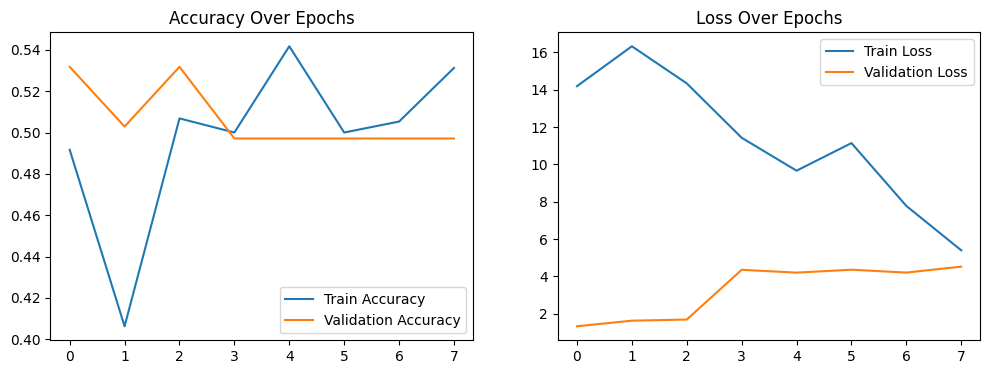


=== Final Evaluation ===
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 942ms/step - accuracy: 0.5647 - loss: 1.2634
Test Accuracy: 0.5318


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import cv2

# ======================
# Configuration
# ======================
TASK = "binary_classification"  # Options: "binary_classification", "multiclass_classification"
INPUT_SHAPE = (224, 224, 3)
BATCH_SIZE = 32
EPOCHS = 30
TEST_SIZE = 0.2
RANDOM_STATE = 42

# ======================
# Data Loading
# ======================
def load_data(csv_path, image_dir):
    df = pd.read_csv(csv_path)
    df.columns = df.columns.str.strip()

    if not all(col in df.columns for col in ['Image Name', 'Label']):
        raise ValueError("CSV must contain 'Image Name' and 'Label' columns")

    label_mapping = {label: idx for idx, label in enumerate(sorted(df['Label'].unique()))}
    df['Label'] = df['Label'].map(label_mapping)

    X, y = [], []
    missing_files = 0

    for _, row in df.iterrows():
        img_path = os.path.join(image_dir, row['Image Name'])
        if not os.path.exists(img_path):
            missing_files += 1
            continue

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, INPUT_SHAPE[:2])
        img = img / 255.0

        X.append(img)
        y.append(row['Label'])

    print(f"Loaded {len(X)} images. Missing files: {missing_files}")
    return np.array(X), np.array(y), label_mapping

# ======================
# Model Building
# ======================
def build_model(input_shape, num_classes, task):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D(2, 2),

        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2, 2),

        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2, 2),

        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(256, activation='relu'),
        Dropout(0.3),
        Dense(1 if task == "binary_classification" else num_classes,
              activation='sigmoid' if task == "binary_classification" else 'softmax')
    ])

    loss = 'binary_crossentropy' if task == "binary_classification" else 'categorical_crossentropy'
    metrics = ['accuracy']

    model.compile(optimizer='adam', loss=loss, metrics=metrics)
    return model

# ======================
# Diagnostics
# ======================
def run_diagnostics(model, X_train, y_train):
    print("\n=== Initial Prediction Test ===")
    initial_preds = model.predict(X_train[:5])
    print(f"Untrained model predictions:\n{initial_preds.flatten()}")

    print("\n=== Class Distribution ===")
    unique, counts = np.unique(y_train, return_counts=True)
    print(dict(zip(unique, counts)))

    print("\n=== Input Data Range ===")
    print(f"Min: {X_train.min():.2f}, Max: {X_train.max():.2f}")

# ======================
# Main Execution
# ======================
def main():
    X, y, label_mapping = load_data(
        csv_path="/content/drive/MyDrive/train.csv",
        image_dir="/content/drive/MyDrive/train_images_preprocessed/"
    )

    if TASK == "multiclass_classification":
        y = tf.keras.utils.to_categorical(y, num_classes=len(label_mapping))

    stratify = y if TASK in ["binary_classification", "multiclass_classification"] else None
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=stratify
    )

    model = build_model(INPUT_SHAPE, len(label_mapping), TASK)
    model.summary()

    run_diagnostics(model, X_train, y_train)

    if TASK in ["binary_classification", "multiclass_classification"]:
        class_weights = compute_class_weight(
            'balanced',
            classes=np.unique(np.argmax(y_train, axis=1) if TASK == "multiclass_classification" else y_train),
            y=np.argmax(y_train, axis=1) if TASK == "multiclass_classification" else y_train
        )
        class_weights = dict(enumerate(class_weights))
    else:
        class_weights = None

    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        zoom_range=0.2
    )
    train_gen = datagen.flow(X_train, y_train, batch_size=BATCH_SIZE)

    test_datagen = ImageDataGenerator()
    test_gen = test_datagen.flow(X_test, y_test, batch_size=BATCH_SIZE)

    callbacks = [
        EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6),
        ModelCheckpoint("best_model.h5", save_best_only=True, monitor="val_loss", mode="min")
    ]

    print("\n=== Training Model ===")
    history = model.fit(
        train_gen,
        steps_per_epoch=len(X_train) // BATCH_SIZE,
        validation_data=test_gen,
        epochs=EPOCHS,
        callbacks=callbacks,
        class_weight=class_weights
    )

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.legend()
    plt.show()

    print("\n=== Final Evaluation ===")
    test_loss, test_acc = model.evaluate(test_gen)
    print(f"Test Accuracy: {test_acc:.4f}")

if __name__ == "__main__":
    main()


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import cv2

# ======================
# Configuration
# ======================
TASK = "binary_classification"
INPUT_SHAPE = (224, 224, 3)
BATCH_SIZE = 128
EPOCHS = 30
TEST_SIZE = 0.2
RANDOM_STATE = 42

# ======================
# Data Loading
# ======================
def load_data(csv_path, image_dir):
    df = pd.read_csv(csv_path)
    df.columns = df.columns.str.strip()

    if not all(col in df.columns for col in ['Image Name', 'Label']):
        raise ValueError("CSV must contain 'Image Name' and 'Label' columns")

    label_mapping = {label: idx for idx, label in enumerate(sorted(df['Label'].unique()))}
    df['Label'] = df['Label'].map(label_mapping)

    X, y = [], []
    missing_files = 0

    for _, row in df.iterrows():
        img_path = os.path.join(image_dir, row['Image Name'])
        if not os.path.exists(img_path):
            missing_files += 1
            continue

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, INPUT_SHAPE[:2])
        img = img / 255.0  # Normalize

        X.append(img)
        y.append(row['Label'])

    print(f"Loaded {len(X)} images. Missing files: {missing_files}")
    return np.array(X), np.array(y), label_mapping

# ======================
# Model Building
# ======================
from tensorflow.keras.regularizers import l2

def build_model(input_shape, num_classes, task):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_regularizer=l2(0.01)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(256, activation='relu', kernel_regularizer=l2(0.01)),  # L2 Regularization added
        Dropout(0.5),  # Keep dropout to prevent overfitting
        Dense(1 if task == "binary_classification" else num_classes,
              activation='sigmoid' if task == "binary_classification" else 'softmax',
              kernel_regularizer=l2(0.01))  # L2 Regularization on the final layer
    ])

    loss = 'binary_crossentropy' if task == "binary_classification" else 'categorical_crossentropy'
    metrics = ['accuracy']


    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-6), loss=loss, metrics=['accuracy'])

    return model
'''
def build_model(input_shape, num_classes, task):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(2, 2),
        BatchNormalization(),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        BatchNormalization(),

        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        BatchNormalization(),

        GlobalAveragePooling2D(),
        Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.5),  # Prevent overfitting

        Dense(1 if task == "binary_classification" else num_classes,
              activation='sigmoid' if task == "binary_classification" else 'softmax')
    ])

    loss = 'binary_crossentropy' if task == "binary_classification" else 'categorical_crossentropy'
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss=loss, metrics=['accuracy'])

    return model
    '''

# ======================
# Diagnostics
# ======================
def run_diagnostics(model, X_train, y_train):
    print("\n=== Initial Prediction Test ===")
    initial_preds = model.predict(X_train[:5])
    print(f"Untrained model predictions:\n{initial_preds.flatten()}")

    print("\n=== Class Distribution ===")
    unique, counts = np.unique(y_train, return_counts=True)
    print(dict(zip(unique, counts)))

    print("\n=== Input Data Range ===")
    print(f"Min: {X_train.min():.2f}, Max: {X_train.max():.2f}")

# ======================
# Main Execution
# ======================
def main():
    # Load data
    X, y, label_mapping = load_data(
        csv_path="/content/drive/MyDrive/train.csv",
        image_dir="/content/drive/MyDrive/train_images_preprocessed/"
    )

    if TASK == "multiclass_classification":
        y = tf.keras.utils.to_categorical(y, num_classes=len(label_mapping))

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y
    )

    model = build_model(INPUT_SHAPE, len(label_mapping), TASK)
    model.summary()

    run_diagnostics(model, X_train, y_train)

    class_weights = compute_class_weight(
        class_weight='balanced',
        classes=np.unique(y_train),
        y=y_train
    )
    class_weights = dict(enumerate(class_weights))

    # Data Augmentation (Only for Training)

    datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    horizontal_flip=True,
    zoom_range=0.3
    )


    train_gen = datagen.flow(X_train, y_train, batch_size=BATCH_SIZE)

    # Callbacks
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6)
    ]

    print("\n=== Training Model ===")
    history = model.fit(
        train_gen,
        steps_per_epoch=len(X_train) // BATCH_SIZE,
        validation_data=(X_test, y_test),
        epochs=EPOCHS,
        callbacks=callbacks,
        class_weight=class_weights
    )

    # Plot Training History
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.legend()
    plt.show()

    # Evaluate
    print("\n=== Final Evaluation ===")
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print(f"Test Accuracy: {test_acc:.4f}")

if __name__ == "__main__":
    main()

Loaded 864 images. Missing files: 6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,244,929 (84.86 MB)

 Trainable params: 22,244,929 (84.86 MB)

 Non-trainable params: 0 (0.00 B)


=== Initial Prediction Test ===


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
Untrained model predictions:
[0.50056386 0.5020935  0.50134254 0.5012014  0.4991009 ]

=== Class Distribution ===
{np.int64(0): np.int64(345), np.int64(1): np.int64(346)}

=== Input Data Range ===
Min: 0.00, Max: 1.00

=== Training Model ===


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 101s 20s/step - accuracy: 0.5008 - loss: 7.1500 - val_accuracy: 0.5087 - val_loss: 7.1434 - learning_rate: 1.0000e-06
Epoch 2/30
1/5 ━━━━━━━━━━━━━━━━━━━━ 26s 7s/step - accuracy: 0.5882 - loss: 7.1425

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


5/5 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.5882 - loss: 7.1425 - val_accuracy: 0.5087 - val_loss: 7.1417 - learning_rate: 1.0000e-06
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 86s 17s/step - accuracy: 0.4510 - loss: 7.1414 - val_accuracy: 0.5491 - val_loss: 7.1332 - learning_rate: 1.0000e-06
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - accuracy: 0.4297 - loss: 7.1362 - val_accuracy: 0.5434 - val_loss: 7.1315 - learning_rate: 1.0000e-06
Epoch 5/30
3/5 ━━━━━━━━━━━━━━━━━━━━ 24s 12s/step - accuracy: 0.4387 - loss: 7.1333

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, Activation, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import cv2

# ======================
# Configuration
# ======================
TASK = "binary_classification"
INPUT_SHAPE = (224, 224, 3)
BATCH_SIZE = 128
EPOCHS = 30
TEST_SIZE = 0.2
RANDOM_STATE = 42

# ======================
# Data Loading
# ======================
def load_data(csv_path, image_dir):
    df = pd.read_csv(csv_path)
    df.columns = df.columns.str.strip()

    if not all(col in df.columns for col in ['Image Name', 'Label']):
        raise ValueError("CSV must contain 'Image Name' and 'Label' columns")

    label_mapping = {label: idx for idx, label in enumerate(sorted(df['Label'].unique()))}
    df['Label'] = df['Label'].map(label_mapping)

    X, y = [], []
    missing_files = 0

    for _, row in df.iterrows():
        img_path = os.path.join(image_dir, row['Image Name'])
        if not os.path.exists(img_path):
            missing_files += 1
            continue

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, INPUT_SHAPE[:2])
        img = img / 255.0  # Normalize

        X.append(img)
        y.append(row['Label'])

    print(f"Loaded {len(X)} images. Missing files: {missing_files}")
    return np.array(X), np.array(y), label_mapping

# ======================
# Model Building
# ======================
def build_model(input_shape, num_classes, task):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_regularizer=l2(0.001)),
        MaxPooling2D(2, 2),
        BatchNormalization(),

        Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
        MaxPooling2D(2, 2),
        BatchNormalization(),

        Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
        MaxPooling2D(2, 2),
        BatchNormalization(),

        Flatten(),
        Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.3),  # Reduced from 0.5

        Dense(1 if task == "binary_classification" else num_classes,
              activation='sigmoid' if task == "binary_classification" else 'softmax')
    ])

    loss = 'binary_crossentropy' if task == "binary_classification" else 'categorical_crossentropy'

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss=loss, metrics=['accuracy'])

    return model

# ======================
# Diagnostics
# ======================
def run_diagnostics(model, X_train, y_train):
    print("\n=== Initial Prediction Test ===")
    initial_preds = model.predict(X_train[:5])
    print(f"Untrained model predictions:\n{initial_preds.flatten()}")

    print("\n=== Class Distribution ===")
    unique, counts = np.unique(y_train, return_counts=True)
    print(dict(zip(unique, counts)))

    print("\n=== Input Data Range ===")
    print(f"Min: {X_train.min():.2f}, Max: {X_train.max():.2f}")

# ======================
# Main Execution
# ======================
def main():
    # Load data
    X, y, label_mapping = load_data(
        csv_path="/content/drive/MyDrive/train.csv",
        image_dir="/content/drive/MyDrive/train_images_preprocessed/"
    )

    if TASK == "multiclass_classification":
        y = tf.keras.utils.to_categorical(y, num_classes=len(label_mapping))

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y
    )

    model = build_model(INPUT_SHAPE, len(label_mapping), TASK)
    model.summary()

    run_diagnostics(model, X_train, y_train)

    class_weights = compute_class_weight(
        class_weight='balanced',
        classes=np.unique(y_train),
        y=y_train
    )
    class_weights = dict(enumerate(class_weights))

    # Data Augmentation (Only for Training)
    datagen = ImageDataGenerator(
        rotation_range=15,   # Reduced from 30
        width_shift_range=0.1,  # Reduced from 0.3
        height_shift_range=0.1, # Reduced from 0.3
        horizontal_flip=True,
        zoom_range=0.1  # Reduced from 0.3
    )

    train_gen = datagen.flow(X_train, y_train, batch_size=BATCH_SIZE)

    # Callbacks
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6)
    ]

    print("\n=== Training Model ===")
    history = model.fit(
        train_gen,
        steps_per_epoch=max(1, len(X_train) // BATCH_SIZE),  # Fixed step calculation
        validation_data=(X_test, y_test),
        epochs=EPOCHS,
        callbacks=callbacks,
        class_weight=class_weights
    )

    # Plot Training History
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.legend()
    plt.show()

    # Evaluate
    print("\n=== Final Evaluation ===")
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print(f"Test Accuracy: {test_acc:.4f}")

if __name__ == "__main__":
    main()


Loaded 864 images. Missing files: 6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 111, 111, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 54, 54, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 26, 26, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,246,849 (84.86 MB)

 Trainable params: 22,245,889 (84.86 MB)

 Non-trainable params: 960 (3.75 KB)


=== Initial Prediction Test ===
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
Untrained model predictions:
[0.4948757  0.48804295 0.4966407  0.4892116  0.48766375]

=== Class Distribution ===
{np.int64(0): np.int64(345), np.int64(1): np.int64(346)}

=== Input Data Range ===
Min: 0.00, Max: 1.00

=== Training Model ===


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 98s 18s/step - accuracy: 0.5175 - loss: 2.3741 - val_accuracy: 0.4740 - val_loss: 1.3435 - learning_rate: 1.0000e-04
Epoch 2/30
1/5 ━━━━━━━━━━━━━━━━━━━━ 1:07 17s/step - accuracy: 0.4844 - loss: 1.8156

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


5/5 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.4844 - loss: 1.8156 - val_accuracy: 0.4971 - val_loss: 1.3429 - learning_rate: 1.0000e-04
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 95s 21s/step - accuracy: 0.4758 - loss: 1.7710 - val_accuracy: 0.4971 - val_loss: 1.3549 - learning_rate: 1.0000e-04
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.5078 - loss: 1.5201 - val_accuracy: 0.4971 - val_loss: 1.3555 - learning_rate: 1.0000e-04
Epoch 5/30


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
import cv2

# ======================
# Configuration
# ======================
TASK = "binary_classification"
INPUT_SHAPE = (224, 224, 3)
BATCH_SIZE = 32
EPOCHS = 100
TEST_SIZE = 0.2
RANDOM_STATE = 42

# ======================
# Data Loading (Fixed Path Handling)
# ======================
def load_data(csv_path, image_dir):
    df = pd.read_csv(csv_path)
    df.columns = df.columns.str.strip()

    if not all(col in df.columns for col in ['Image Name', 'Label']):
        raise ValueError("CSV must contain 'Image Name' and 'Label' columns")

    label_mapping = {label: idx for idx, label in enumerate(sorted(df['Label'].unique()))}
    df['Label'] = df['Label'].map(label_mapping)

    X, y = [], []

    for _, row in df.iterrows():
        img_path = os.path.join(image_dir, row['Image Name'])
        if not os.path.exists(img_path):
            print(f"Missing file: {img_path}")
            continue

        try:
            img = cv2.imread(img_path)
            if img is None:
                raise ValueError(f"Failed to read image: {img_path}")

            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, INPUT_SHAPE[:2])
            img = img / 255.0

            X.append(img)
            y.append(row['Label'])
        except Exception as e:
            print(f"Error processing {img_path}: {str(e)}")

    print(f"Successfully loaded {len(X)} images")
    return np.array(X), np.array(y), label_mapping

# ======================
# Model Building (Final Optimized Version)
# ======================
def build_model(input_shape, num_classes, task):
    model = Sequential([
        Conv2D(64, (3,3), activation='relu', padding='same', input_shape=input_shape),
        BatchNormalization(),
        Conv2D(64, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(2,2),
        Dropout(0.2),

        Conv2D(128, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(128, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(2,2),
        Dropout(0.3),

        Conv2D(256, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(256, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(2,2),
        Dropout(0.4),

        Flatten(),
        Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.5),

        Dense(1 if task == "binary_classification" else num_classes,
              activation='sigmoid' if task == "binary_classification" else 'softmax')
    ])

    optimizer = Adam(
        learning_rate=0.0001,
        beta_1=0.9,
        beta_2=0.999,
        amsgrad=True
    )

    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy' if task == "binary_classification" else 'categorical_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC()]
    )
    return model

# ======================
# Training Execution (Fixed Issues)
# ======================
def main():
    # Load data with error handling
    try:
        X, y, label_mapping = load_data(
            csv_path="/content/drive/MyDrive/train.csv",
            image_dir="/content/drive/MyDrive/train_images_preprocessed/"
        )
    except Exception as e:
        print(f"Data loading failed: {str(e)}")
        return

    # Convert labels for multiclass
    if TASK == "multiclass_classification":
        y = tf.keras.utils.to_categorical(y, num_classes=len(label_mapping))

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y
    )

    # Build model
    model = build_model(INPUT_SHAPE, len(label_mapping), TASK)
    model.summary()

    # Class weights
    try:
        class_weights = compute_class_weight(
            'balanced',
            classes=np.unique(np.argmax(y_train, axis=1) if TASK == "multiclass_classification" else y_train),
            y=np.argmax(y_train, axis=1) if TASK == "multiclass_classification" else y_train
        )
        class_weights = dict(enumerate(class_weights))
    except Exception as e:
        print(f"Class weight computation failed: {str(e)}")
        class_weights = None

    # Data augmentation
    train_datagen = ImageDataGenerator(
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    train_gen = train_datagen.flow(X_train, y_train, batch_size=BATCH_SIZE)

    # Callbacks
    callbacks = [
        EarlyStopping(
            monitor='val_accuracy',
            patience=15,
            mode='max',
            restore_best_weights=True,
            min_delta=0.001
        ),
        ReduceLROnPlateau(
            monitor='val_accuracy',
            factor=0.5,
            patience=5,
            verbose=1,
            mode='max',
            min_lr=1e-7
        ),
        ModelCheckpoint(
            'best_model.h5',
            monitor='val_accuracy',
            save_best_only=True,
            mode='max'
        )
    ]

    # Training
    print("\n=== Starting Training ===")
    try:
        history = model.fit(
            train_gen,
            steps_per_epoch=max(1, len(X_train) // BATCH_SIZE),
            validation_data=(X_test, y_test),
            epochs=EPOCHS,
            callbacks=callbacks,
            class_weight=class_weights
        )
    except Exception as e:
        print(f"Training failed: {str(e)}")
        return

    # Evaluation
    print("\n=== Final Evaluation ===")
    try:
        model = load_model('best_model.h5')  # Load best saved model
        results = model.evaluate(X_test, y_test)

        print("\nTest Metrics:")
        print(f"- Loss: {results[0]:.4f}")
        print(f"- Accuracy: {results[1]:.4f}")
        print(f"- AUC: {results[2]:.4f}")

        if results[1] < 0.7:
            print("\nAccuracy below 0.7. Recommended actions:")
            print("1. Check for class imbalance")
            print("2. Increase model capacity")
            print("3. Try transfer learning (EfficientNet)")
    except Exception as e:
        print(f"Evaluation failed: {str(e)}")

    # Plotting
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

Missing file: /content/drive/MyDrive/train_images_preprocessed/train_images
Missing file: /content/drive/MyDrive/train_images_preprocessed/train (1).gsheet
Missing file: /content/drive/MyDrive/train_images_preprocessed/images_train.gsheet
Missing file: /content/drive/MyDrive/train_images_preprocessed/train.gsheet
Missing file: /content/drive/MyDrive/train_images_preprocessed/train.csv
Missing file: /content/drive/MyDrive/train_images_preprocessed/labeled_images.csv
Successfully loaded 864 images


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 224, 224, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 224, 224, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 112, 112, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 112, 112, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 56, 56, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 56, 56, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 103,912,513 (396.39 MB)

 Trainable params: 103,909,697 (396.38 MB)

 Non-trainable params: 2,816 (11.00 KB)


=== Starting Training ===


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, CSVLogger
from tensorflow.keras.regularizers import l2
import cv2

# ======================
# Configuration (Reduced Epochs)
# ======================
TASK = "binary_classification"
INPUT_SHAPE = (224, 224, 3)
BATCH_SIZE = 32
EPOCHS = 50  # Reduced from 100 to test if it runs
TEST_SIZE = 0.2
RANDOM_STATE = 42

# ======================
# Debugging Setup
# ======================
print("Initializing...")
print(f"TensorFlow Version: {tf.__version__}")
print(f"GPU Available: {len(tf.config.list_physical_devices('GPU')) > 0}")

# ======================
# Data Loading (With Progress Feedback)
# ======================
def load_data(csv_path, image_dir):
    print("\nLoading data...")
    try:
        df = pd.read_csv(csv_path)
        print("CSV loaded successfully")
    except Exception as e:
        print(f"CSV loading failed: {str(e)}")
        return None, None, None

    df.columns = df.columns.str.strip()

    if not all(col in df.columns for col in ['Image Name', 'Label']):
        print("Error: Missing required columns in CSV")
        return None, None, None

    label_mapping = {label: idx for idx, label in enumerate(sorted(df['Label'].unique()))}
    df['Label'] = df['Label'].map(label_mapping)

    X, y = [], []
    missing_files = 0
    loaded_files = 0

    for idx, row in df.iterrows():
        img_path = os.path.join(image_dir, row['Image Name'])
        if not os.path.exists(img_path):
            missing_files += 1
            continue

        try:
            img = cv2.imread(img_path)
            if img is None:
                print(f"Warning: Failed to read image {img_path} (corrupt or invalid format)")
                missing_files += 1
                continue

            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, INPUT_SHAPE[:2])
            img = img / 255.0

            X.append(img)
            y.append(row['Label'])
            loaded_files += 1

            if loaded_files % 100 == 0:
                print(f"Loaded {loaded_files} images...")

        except Exception as e:
            print(f"Error processing {img_path}: {str(e)}")
            missing_files += 1

    print(f"\nData loading complete. Success: {loaded_files}, Failed: {missing_files}")
    return np.array(X), np.array(y), label_mapping

# ======================
# Simplified Model (For Debugging)
# ======================
def build_model(input_shape, num_classes, task):
    print("\nBuilding model...")
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(2, 2),
        BatchNormalization(),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        BatchNormalization(),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),

        Dense(1 if task == "binary_classification" else num_classes,
              activation='sigmoid' if task == "binary_classification" else 'softmax')
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy' if task == "binary_classification" else 'categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# ======================
# Training Execution (With Timeouts)
# ======================
def main():
    # Load data with verbose feedback
    X, y, label_mapping = load_data(
        csv_path="/content/drive/MyDrive/train.csv",
        image_dir="/content/drive/MyDrive/train_images_preprocessed/"
    )

    if X is None:
        print("Data loading failed. Exiting.")
        return

    print(f"\nData shape: {X.shape}")
    print(f"Class distribution: {np.unique(y, return_counts=True)}")

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y
    )

    # Build simplified model
    model = build_model(INPUT_SHAPE, len(label_mapping), TASK)
    model.summary()

    # Callbacks with timeout safety
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=5),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3),
        CSVLogger('training_log.csv')  # Always log progress
    ]

    # Minimal data augmentation
    datagen = ImageDataGenerator(
        rotation_range=10,
        horizontal_flip=True
    )

    print("\nStarting training...")
    try:
        history = model.fit(
            datagen.flow(X_train, y_train, batch_size=BATCH_SIZE),
            steps_per_epoch=len(X_train) // BATCH_SIZE,
            validation_data=(X_test, y_test),
            epochs=EPOCHS,
            callbacks=callbacks,
            verbose=1
        )
    except Exception as e:
        print(f"Training failed: {str(e)}")
        return

    # Evaluation
    print("\nEvaluating model...")
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print(f"\nFinal Test Accuracy: {test_acc:.4f}")

    # Plotting
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.legend()

    plt.show()

if __name__ == "__main__":
    print("Starting script execution...")
    main()
    print("Execution completed.")

Initializing...
TensorFlow Version: 2.18.0
GPU Available: False
Starting script execution...

Loading data...
CSV loaded successfully
Loaded 100 images...
Loaded 200 images...
Loaded 300 images...
Loaded 400 images...
Loaded 500 images...
Loaded 600 images...
Loaded 700 images...
Loaded 800 images...

Data loading complete. Success: 864, Failed: 6

Data shape: (864, 224, 224, 3)
Class distribution: (array([0, 1]), array([432, 432]))

Building model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 111, 111, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 54, 54, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      23,888,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,907,905 (91.20 MB)

 Trainable params: 23,907,713 (91.20 MB)

 Non-trainable params: 192 (768.00 B)


Starting training...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 86s 4s/step - accuracy: 0.4777 - loss: 26.4950 - val_accuracy: 0.4971 - val_loss: 1.5964 - learning_rate: 0.0010
Epoch 2/50
 1/21 ━━━━━━━━━━━━━━━━━━━━ 1:16 4s/step - accuracy: 0.5312 - loss: 3.8076

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 215ms/step - accuracy: 0.5312 - loss: 3.8076 - val_accuracy: 0.4971 - val_loss: 1.5828 - learning_rate: 0.0010
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 134s 4s/step - accuracy: 0.4707 - loss: 3.0570 - val_accuracy: 0.4566 - val_loss: 1.0573 - learning_rate: 0.0010
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 257ms/step - accuracy: 0.5625 - loss: 1.0298 - val_accuracy: 0.4566 - val_loss: 1.0555 - learning_rate: 0.0010
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 137s 4s/step - accuracy: 0.4729 - loss: 1.0893 - val_accuracy: 0.5202 - val_loss: 1.2534 - learning_rate: 0.0010
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 293ms/step - accuracy: 0.4688 - loss: 1.9711 - val_accuracy: 0.5202 - val_loss: 1.0796 - learning_rate: 0.0010
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 146s 5s/step - accuracy: 0.5275 - loss: 1.2462 - val_accuracy: 0.5087 - val_loss: 0.7013 - learning_rate: 0.0010
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 257ms/step - accuracy: 0.5312 - loss: 0.6067 - val_accuracy: 

cnn model


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import cv2

# ======================
# Configuration
# ======================
TASK = "binary_classification"
INPUT_SHAPE = (224, 224, 3)
BATCH_SIZE = 16  # Reduced batch size
EPOCHS = 30
TEST_SIZE = 0.2
RANDOM_STATE = 42

# ======================
# Data Loading (Fixed)
# ======================
def load_data(csv_path, image_dir):
    df = pd.read_csv(csv_path)
    df.columns = df.columns.str.strip()

    if not all(col in df.columns for col in ['Image Name', 'Label']):
        raise ValueError("CSV must contain 'Image Name' and 'Label' columns")

    label_mapping = {label: idx for idx, label in enumerate(sorted(df['Label'].unique()))}
    df['Label'] = df['Label'].map(label_mapping)

    X, y = [], []

    for _, row in df.iterrows():
        img_path = os.path.join(image_dir, row['Image Name'])
        if not os.path.exists(img_path):
            continue

        img = cv2.imread(img_path)
        if img is None:
            continue

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, INPUT_SHAPE[:2])
        img = img / 255.0  # Normalize

        X.append(img)
        y.append(row['Label'])

    return np.array(X), np.array(y), label_mapping

# ======================
# Model Building (Fixed)
# ======================
def build_model(input_shape, num_classes, task):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        Dropout(0.25),

        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        Dropout(0.25),

        Flatten(),
        Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        Dropout(0.5),

        Dense(1 if task == "binary_classification" else num_classes,
              activation='sigmoid' if task == "binary_classification" else 'softmax')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Lower learning rate
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# ======================
# Training Execution (Fixed)
# ======================
def main():
    # Load data
    X, y, label_mapping = load_data(
        csv_path="/content/drive/MyDrive/train.csv",
        image_dir="/content/drive/MyDrive/train_images_preprocessed/"
    )

    # Check data
    if len(X) == 0:
        print("Error: No images loaded!")
        return

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y
    )

    # Data augmentation
    train_datagen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        zoom_range=0.1
    )

    # Calculate steps_per_epoch properly
    steps_per_epoch = max(1, len(X_train) // BATCH_SIZE)

    model = build_model(INPUT_SHAPE, len(label_mapping), TASK)
    model.summary()

    # Callbacks
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
    ]

    # Training
    history = model.fit(
        train_datagen.flow(X_train, y_train, batch_size=BATCH_SIZE),
        steps_per_epoch=steps_per_epoch,
        validation_data=(X_test, y_test),
        epochs=EPOCHS,
        callbacks=callbacks,
        verbose=1
    )

    # Evaluation
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print(f"\nFinal Test Accuracy: {test_acc:.4f}")

    # Plotting
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.legend()

    plt.show()

if __name__ == "__main__":
    main()

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import cv2

# ======================
# Configuration
# ======================
TASK = "binary_classification"
INPUT_SHAPE = (224, 224, 3)
BATCH_SIZE = 16  # Reduced batch size
EPOCHS = 30
TEST_SIZE = 0.2
RANDOM_STATE = 42

# ======================
# Data Loading (Fixed)
# ======================
def load_data(csv_path, image_dir):
    df = pd.read_csv(csv_path)
    df.columns = df.columns.str.strip()

    if not all(col in df.columns for col in ['Image Name', 'Label']):
        raise ValueError("CSV must contain 'Image Name' and 'Label' columns")

    label_mapping = {label: idx for idx, label in enumerate(sorted(df['Label'].unique()))}
    df['Label'] = df['Label'].map(label_mapping)

    X, y = [], []

    for _, row in df.iterrows():
        img_path = os.path.join(image_dir, row['Image Name'])
        if not os.path.exists(img_path):
            continue

        img = cv2.imread(img_path)
        if img is None:
            continue

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, INPUT_SHAPE[:2])
        img = img / 255.0  # Normalize

        X.append(img)
        y.append(row['Label'])

    return np.array(X), np.array(y), label_mapping

# ======================
# Model Building (Fixed)
# ======================
def build_model(input_shape, num_classes, task):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        Dropout(0.25),

        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        Dropout(0.25),

        Flatten(),
        Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        Dropout(0.5),

        Dense(1 if task == "binary_classification" else num_classes,
              activation='sigmoid' if task == "binary_classification" else 'softmax')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Lower learning rate
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# ======================
# Training Execution (Fixed)
# ======================
def main():
    # Load data
    X, y, label_mapping = load_data(
        csv_path="/content/drive/MyDrive/train.csv",
        image_dir="/content/drive/MyDrive/train_images_preprocessed/"
    )

    # Check data
    if len(X) == 0:
        print("Error: No images loaded!")
        return

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y
    )

    # Data augmentation
    train_datagen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        zoom_range=0.1
    )

    # Calculate steps_per_epoch properly
    steps_per_epoch = max(1, len(X_train) // BATCH_SIZE)

    model = build_model(INPUT_SHAPE, len(label_mapping), TASK)
    model.summary()

    # Callbacks
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
    ]

    # Training
    history = model.fit(
        train_datagen.flow(X_train, y_train, batch_size=BATCH_SIZE),
        steps_per_epoch=steps_per_epoch,
        validation_data=(X_test, y_test),
        epochs=EPOCHS,
        callbacks=callbacks,
        verbose=1
    )

    # Evaluation
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print(f"\nFinal Test Accuracy: {test_acc:.4f}")

    # Plotting
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.legend()

    plt.show()

if __name__ == "__main__":
    main()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 222, 222, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 109, 109, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      23,888,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,908,417 (91.20 MB)

 Trainable params: 23,907,969 (91.20 MB)

 Non-trainable params: 448 (1.75 KB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 139s 3s/step - accuracy: 0.4929 - loss: 3.5804 - val_accuracy: 0.5029 - val_loss: 3.2799 - learning_rate: 1.0000e-04
Epoch 2/30
 1/43 ━━━━━━━━━━━━━━━━━━━━ 1:44 2s/step - accuracy: 0.3750 - loss: 3.3262

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


43/43 ━━━━━━━━━━━━━━━━━━━━ 13s 245ms/step - accuracy: 0.3750 - loss: 3.3262 - val_accuracy: 0.5029 - val_loss: 3.2748 - learning_rate: 1.0000e-04
Epoch 3/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 189s 3s/step - accuracy: 0.5395 - loss: 3.2176 - val_accuracy: 0.5029 - val_loss: 3.4549 - learning_rate: 1.0000e-04
Epoch 4/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 13s 245ms/step - accuracy: 0.4375 - loss: 3.2385 - val_accuracy: 0.5029 - val_loss: 3.4615 - learning_rate: 1.0000e-04
Epoch 5/30
 6/43 ━━━━━━━━━━━━━━━━━━━━ 1:52 3s/step - accuracy: 0.5307 - loss: 3.1558